# Исследование объявлений о продаже квартир

## 1. <a id='toc1_'></a>[Введение](#toc0_)

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**

* Научиться определять рыночную стоимость объектов недвижимости.

**Ход исследования**

1. Загрузка файла.
2. Предобработка данных
3. Новые столбцы
4. Исследовательский анализ данных
5. Скорость продажи квартир
6. Зависимость стоимости квартир от разных факторов
7. Cредняя цена одного квадратного метра
8. Cредняя цена каждого километра Санкт-Петербурге
9. Общий вывод

**Содержание**<a id='toc0_'></a>    
1. [Введение](#toc1_)    
1.1. [Откройте файл с данными и изучите общую информацию.](#toc1_1_)    
1.2. [Оценка данных](#toc1_2_)    
2. [Предобработка данных](#toc2_)    
2.1. [Обработка пропусков](#toc2_1_)    
2.1.1. [Анализ](#toc2_1_1_)    
2.1.2. [Обработка](#toc2_1_2_)    
2.1.3. [Результат](#toc2_1_3_)    
2.2. [Типы данных](#toc2_2_)    
2.2.1. [Анализ и обработка](#toc2_2_1_)    
2.2.2. [Результат](#toc2_2_2_)    
2.3. [Дубликаты](#toc2_3_)    
2.3.1. [Явные](#toc2_3_1_)    
2.3.2. [Неявные](#toc2_3_2_)    
2.3.3. [Результат](#toc2_3_3_)    
3. [Посчитайте и добавьте в таблицу новые столбцы](#toc3_)    
3.1. [Цена одного квадратного метра](#toc3_1_)    
3.2. [День недели публикации объявления](#toc3_2_)    
3.3. [Месяц публикации объявления](#toc3_3_)    
3.4. [Год публикации объявления](#toc3_4_)    
3.5. [Тип этажа квартиры (значения — «первый», «последний», «другой»)](#toc3_5_)    
3.6. [Расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).](#toc3_6_)    
3.7. [Результат](#toc3_7_)    
4. [Проведите исследовательский анализ данных](#toc4_)    
4.1. [Редкие и выбивающиеся значения](#toc4_1_)    
4.1.1. [`total_area`](#toc4_1_1_)    
4.1.2. [`living_area`](#toc4_1_2_)    
4.1.3. [`kitchen_area`](#toc4_1_3_)    
4.1.4. [`last_price`](#toc4_1_4_)    
4.1.5. [`rooms`](#toc4_1_5_)    
4.1.6. [`ceiling_height`](#toc4_1_6_)    
4.1.7. [`floor_type`](#toc4_1_7_)    
4.1.8. [`floors_total`](#toc4_1_8_)    
4.1.9. [`cityCenters_nearest`](#toc4_1_9_)    
4.1.10. [`parks_nearest`](#toc4_1_10_)    
4.1.11. [Заключение](#toc4_1_11_)    
5. [Cкорость продажи квартир](#toc5_)    
6. [Зависимость стоимости квартир от разных факторов.](#toc6_)    
6.1. [Численные характеристики](#toc6_1_)    
6.2. [Общая площадь и жилая площадь](#toc6_2_)    
6.3. [Площадь кухни](#toc6_3_)    
6.4. [Количество комнат](#toc6_4_)    
6.5. [Категориальные характеристики](#toc6_5_)    
6.6. [Тип этажа](#toc6_6_)    
6.7. [День недели](#toc6_7_)    
6.8. [Месяц](#toc6_8_)    
6.9. [Год](#toc6_9_)    
6.10. [Вывод](#toc6_10_)    
7. [Cредняя цена одного квадратного метра](#toc7_)    
8. [Cредняя цена каждого километра Санкт-Петербурге](#toc8_)    
9. [Общий вывод](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

### 1.1. <a id='toc1_1_'></a>[Откройте файл с данными и изучите общую информацию.](#toc0_)

In [2]:
path_local = 'datasets/'
path_platform = '/datasets/'
path_extra = ''

df_list = [
    'real_estate_data.csv',
]

if os.path.exists(path_local) and all(list(map(os.path.exists, map(lambda x: path_local + x, df_list)))):
    df_dir = path_local
    print("Файлы найдены.")
elif os.path.exists(path_platform) and all(list(map(os.path.exists, map(lambda x: path_platform + x, df_list)))):
    df_dir = path_platform
    print("Файлы найдены.")
elif os.path.exists(path_extra) and all(list(map(os.path.exists, map(lambda x: path_extra + x, df_list)))):
    df_dir = path_extra
    print("Файлы найдены.")
elif all(list(map(os.path.exists, df_list))):
    df_dir = ''
    print("Файлы найдены.")
else:
    print("Директория не найдена. Файлы не найдены в текущей.")  

df1 = pd.read_csv(os.path.join(df_dir, 'real_estate_data.csv'), sep='\t')

Файлы найдены.


In [3]:
pd.set_option('display.max_columns', None)
df1.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


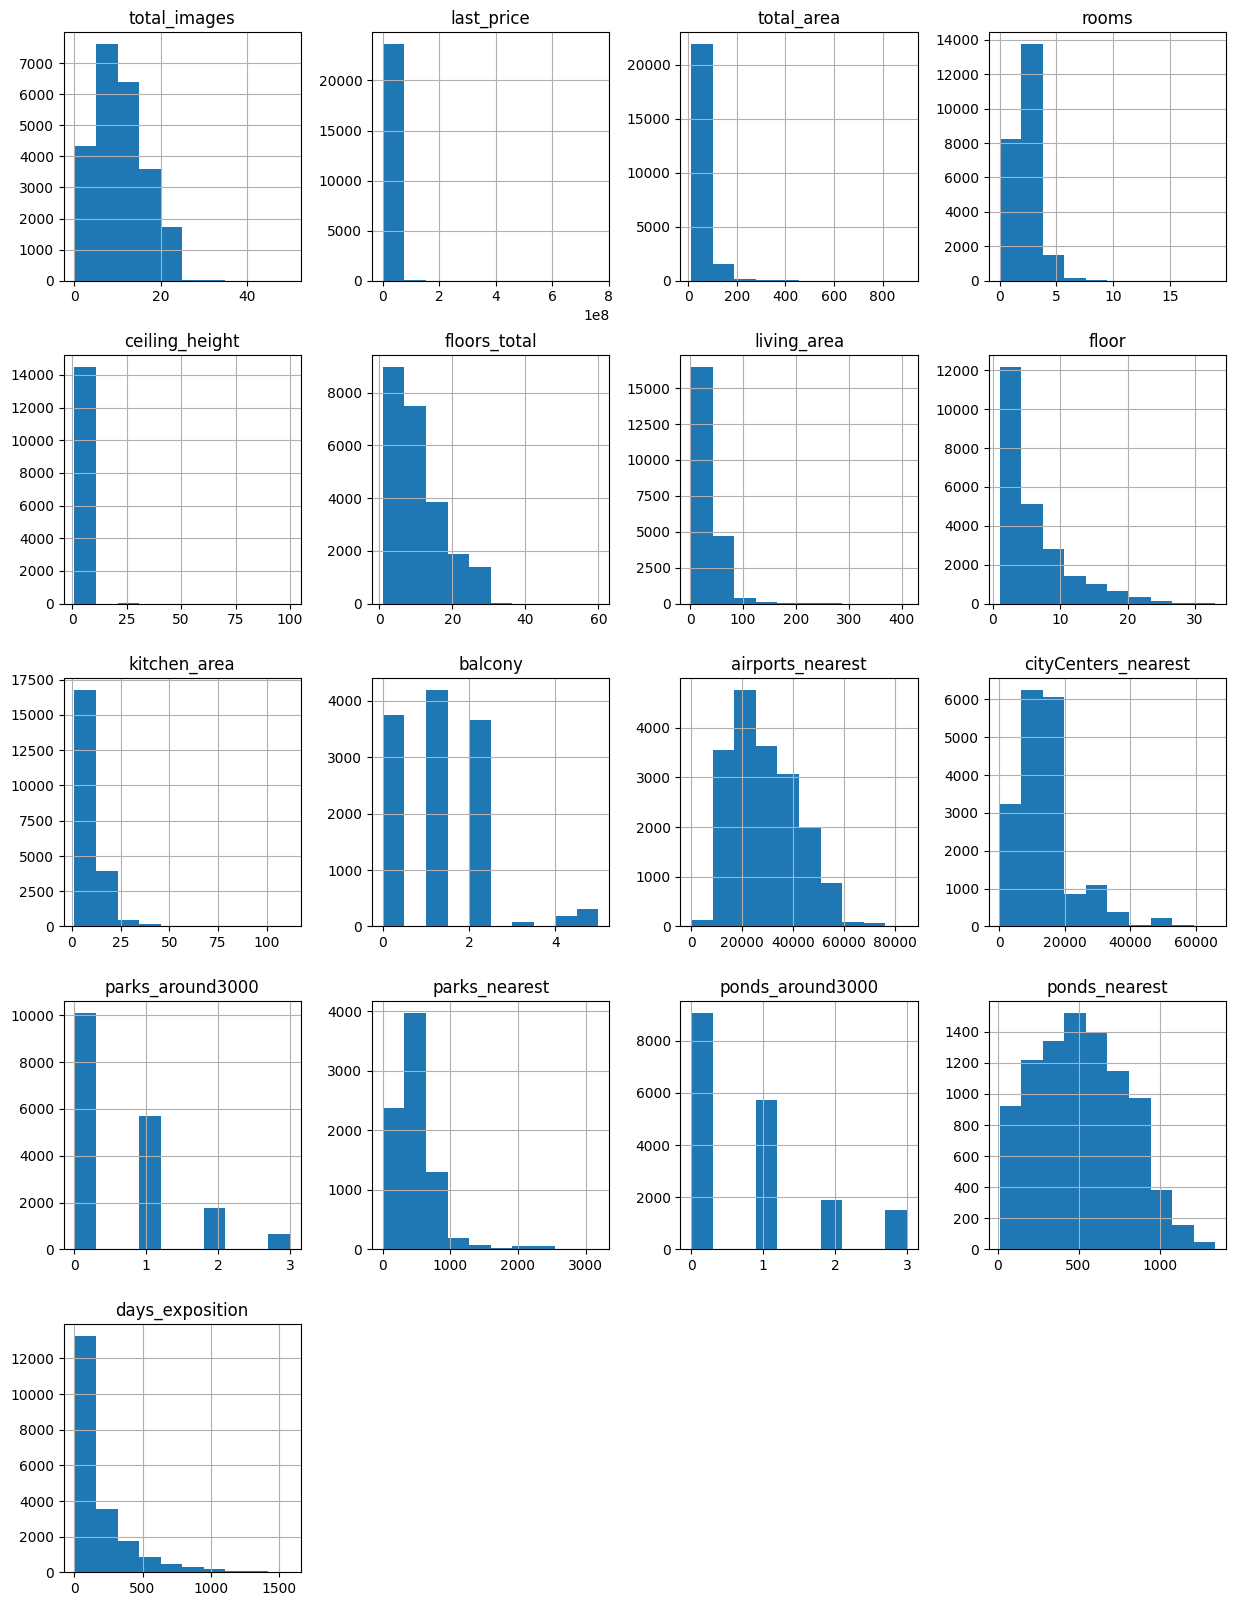

In [4]:
df1.hist(figsize=(15, 20));

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### 1.2. <a id='toc1_2_'></a>[Оценка данных](#toc0_)
Данные о недвижимости хранятся в качестве записей которые содержат данные из объявления в колонках `'total_images', 'last_price', 'total_area', 'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name'` 

Скорее всего, колонки `'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'` хранят картографически полученные данные. Отдельно можно выделить колонку `'days_exposition'` - она отражает сколько времени объявление было доступно, перед тем его сняли, и как следствие говорит о вероятном факте продажи жилья.

Наибольший интерес для анализа представляют колонки `'last_price', 'total_area'` и `'days_exposition'`, т.к. они отражают стоимость продажи, размер продаваемого жилья и спрос на жильё соответственно. Пропуски в последней говорят о том, что данные включают как проданное жильё так и то которое еще находится на рынке.

Таблица также имеет пропуски в ряде других столбцов и использует тип данных float, там где по смыслу находятся целые значения, обработаем эти особенности в следующем разделе.

## 2. <a id='toc2_'></a>[Предобработка данных](#toc0_)
Для того чтобы сохранить изначальные данные если к ним понадобится вернуться, создадим новый DF и будем работать с ним. Используем метод `copy`, чтобы скопировать данные а не только ссылку на них.

In [6]:
df2 = df1.copy()

### 2.1. <a id='toc2_1_'></a>[Обработка пропусков](#toc0_)
#### 2.1.1. <a id='toc2_1_1_'></a>[Анализ](#toc0_)
Начнём переработку с пропусков, посчитаем их.

In [7]:
df1.isna().agg('sum')

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Построим матрицу корреляции, она будет полезна, если, при дальнейшем рассмотрении столбцов с пропусками, удасться найти значения с высокой корреляцией и восполнить пропуски на их основе.

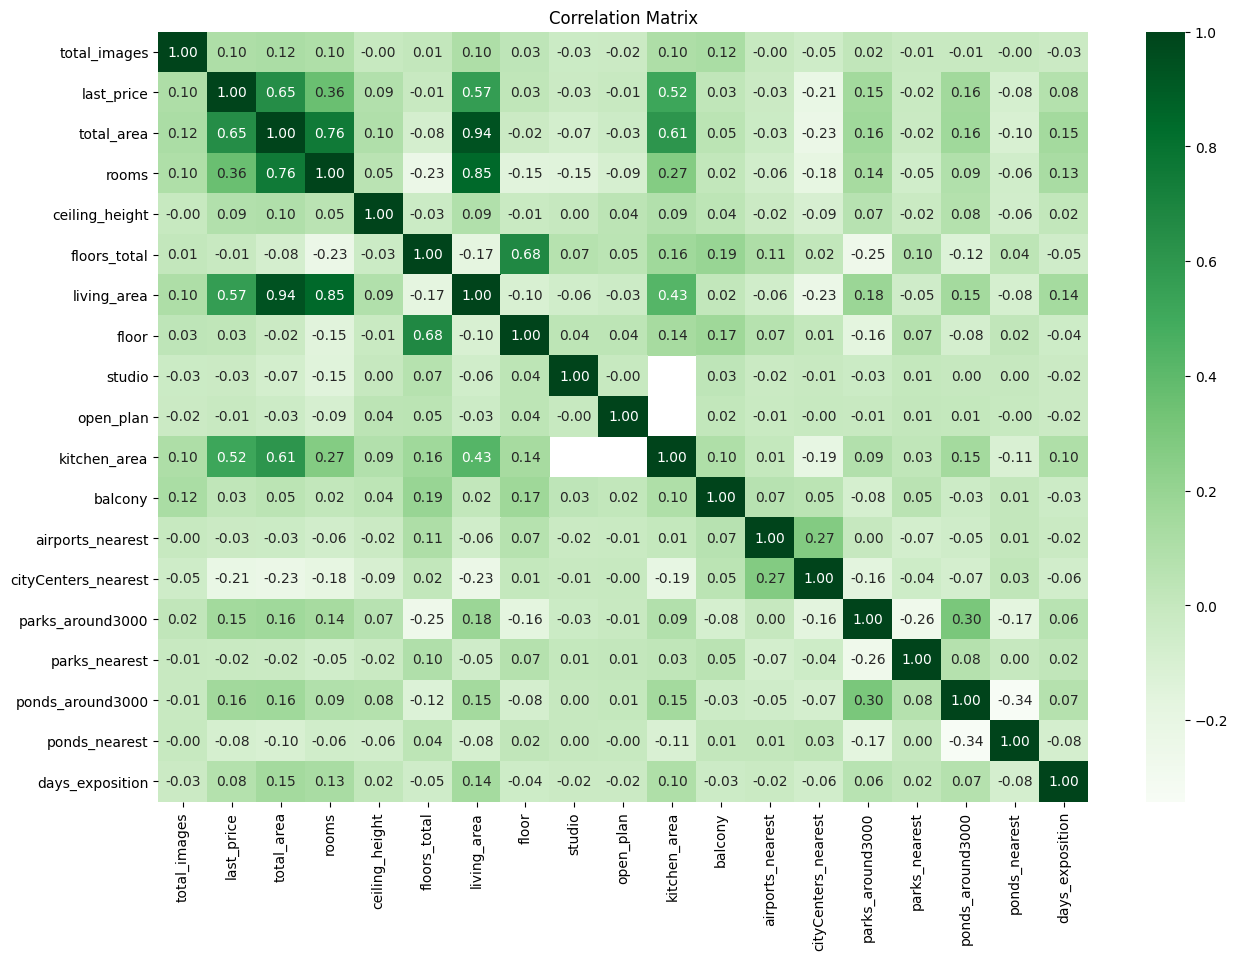

In [8]:
fig1, ax1 = plt.subplots(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True, cmap='Greens', ax=ax1, fmt='.2f').set(title='Correlation Matrix');

Рассмотрим столбцы таблицы данных. Для удобства работы выведем их список.

In [9]:
df1.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Из документации известно что часть столбцов заполняется автоматически, скорее всего это столбцы `'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'`, и заполнять их вручную не целесообразно т.к. они используют картографические данные. Пропуски в этих столбцах скорее всего обусловлены отсутствием данных о локации или каким-то техническим сбоем при работе картографического ПО.
Столбцы `'days_exposition', first_day_exposition ` также наверняка заполняются автоматически, первый имеет пропуски, он содержит количество дней от публикации до снятия объявления, однако `'first_day_exposition'` - день публикации - нет. Имеет смысл предположить что пропуски находятся там где оно по прежнему открыто. Учтём это в анализе но не будем заполнять пропуски, ибо это может исказить информацию, а из корреляционной матрицы видно, что у нас нет достаточного основания чтобы связывать его значения со значениями других столбцов. Остальные столбцы с пропусками скорее всего заполняются вручную, и как следствие могут иметь пропуски вызванные человечским фактором. Рассмотрим их и восстановим значения, где это возможно.

#### 2.1.2. <a id='toc2_1_2_'></a>[Обработка](#toc0_)

Начнём с `'balcony'`. Там где пропущена информация о балконе будем считать что его нет. Учитывая что столбец содержит количество балконов, поставим 0. Убедимся что сработало.

In [10]:
df2['balcony'].fillna(0, inplace=True)
df2['balcony'].isna().sum()

0

Рассмотрим `'is_apartment'`. Исходя из документации это булевы данные, где указано является ли жильё апартментом, в России так называют помещения, в которых можно жить, но они при этом не имеют законного статуса жилых помещений. `.info()` возвращает тип данных объект, проверм значения.

In [11]:
df2['is_apartment'].unique()

array([nan, False, True], dtype=object)

`nan` это пропуски, формально являются числами, и тем самым искажают тип данных. Учитывая что данный столбец интересен с точки зрения анализа апатментов и сравнения апартментов с жильём в целом, можно считать что там где статус "апартмент" не указан, недвижимость им не является. Заменим на `False`.

In [12]:
df2['is_apartment'].fillna(False, inplace=True)
df2['is_apartment'].isna().sum()

0

На коррматрице можно увидеть, что отстутствуют значения площади кухни для квартир - студий и квартир с открытой планировкой. Заполним эти пропуски 0.

In [13]:
df2['kitchen_area'].where(~((df2['studio'] == True) | (df2['open_plan'] == True)), 0, inplace = True)
df2['kitchen_area'].isna().sum()

2062

Пропуски в `'locality_name'` могут исказить тип данных при работе со столбцом и отражают отсутствие информации о названии нас. пункта. Заменим их строкой "Неизвестный населённый пункт".

In [14]:
df2['locality_name'].fillna("Неизвестный населённый пункт", inplace=True)
df2['locality_name'].isna().sum()

0

Рассмотрим пропуски `'floors_total'`. 

In [15]:
df2[df2['floors_total'].isna()].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,False,False,False,12.00,0.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,False,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,False,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,False,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13T00:00:00,2,NaN,NaN,NaN,4,False,False,False,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,NaN,NaN,29.00,22,False,False,False,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,NaN,NaN,19.40,15,False,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23T00:00:00,1,NaN,NaN,22.20,6,False,False,False,12.30,0.0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,NaN,NaN,32.00,12,False,False,False,12.00,0.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


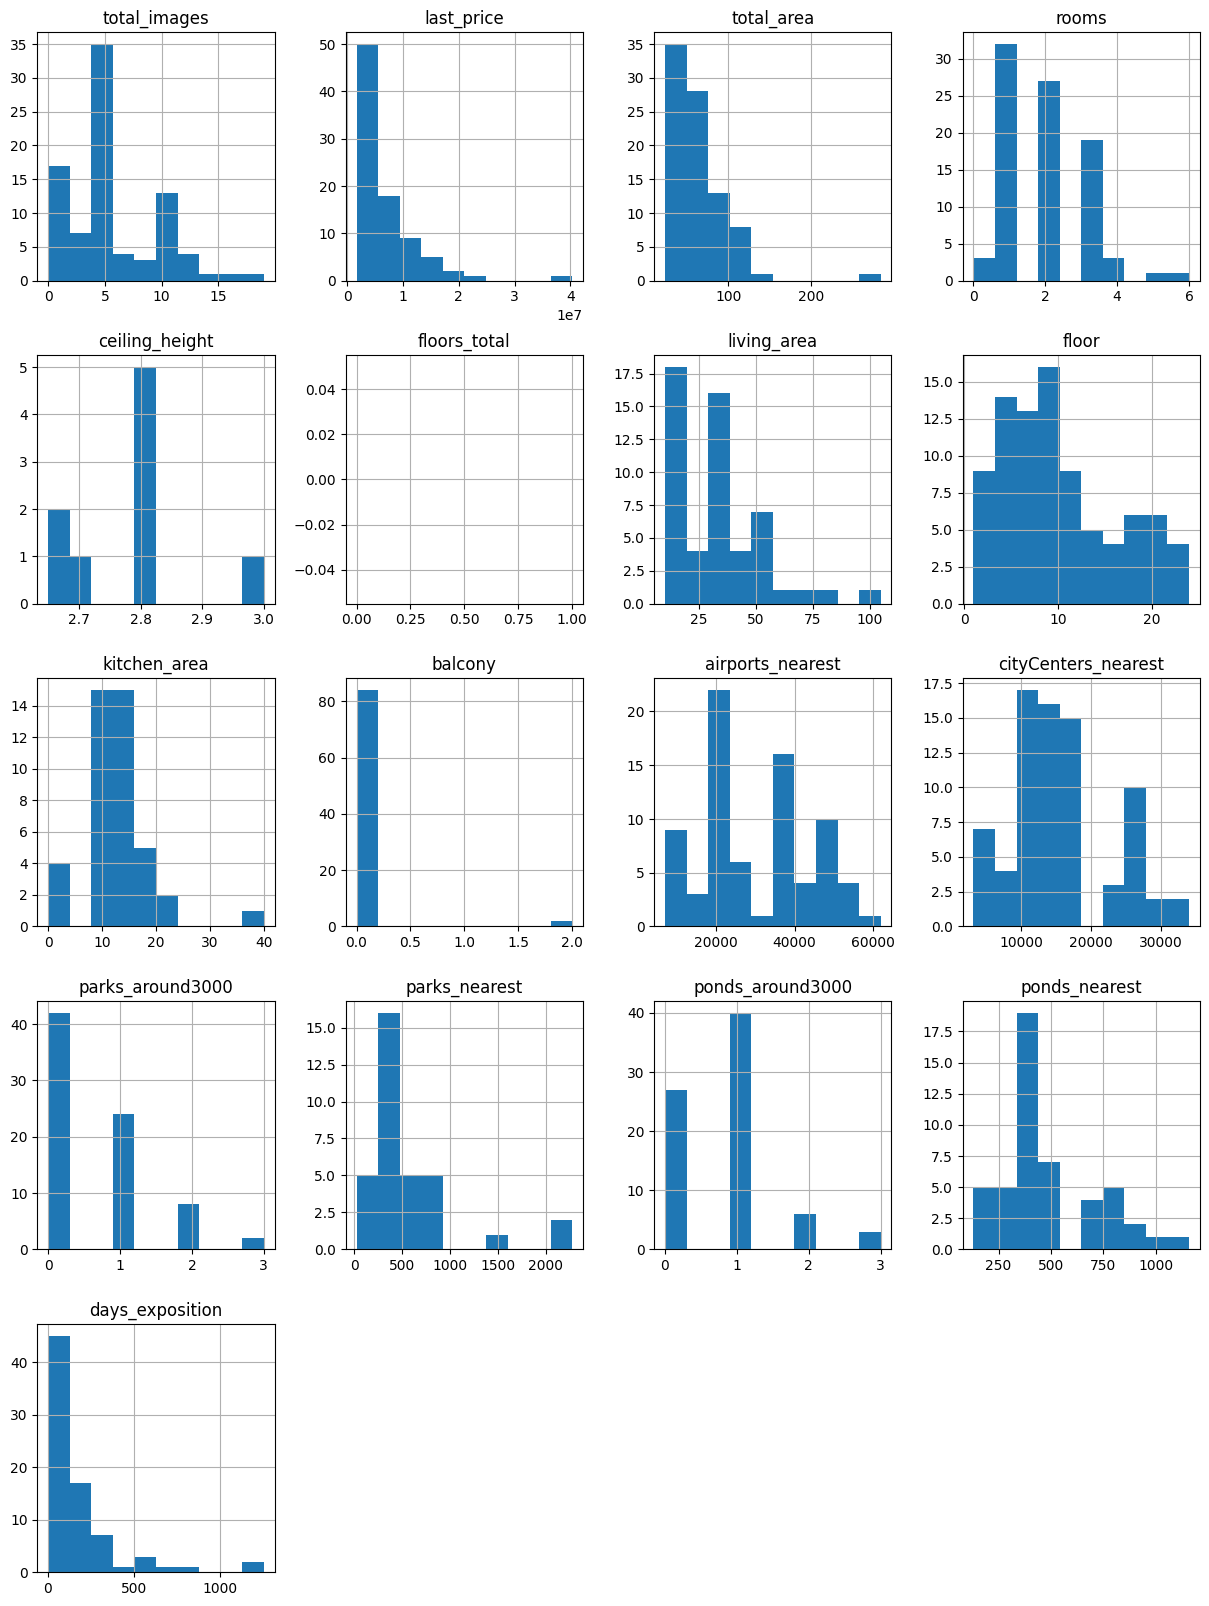

In [16]:
df2[df2['floors_total'].isna()].hist(figsize=(15, 20));

Не из первых 20 строк, не из гистограмм, не из корреляции, нет очевидных способов восполнить пропуски. В отличии от 'locality_name' они не влияют на тип данных - pandas может преобразовать их в инт пропуски если потребуется. Учитывая малое количество строк, если они негативно скажутся на анализе их можно отбросить.`'ceiling_height'` также не коррелирует с другими столбцами, и, по всей видимости, не восполним.

#### 2.1.3. <a id='toc2_1_3_'></a>[Результат](#toc0_)
Мы убрали наиболее очевидные пропуски, дальнейшая работа с пропусками в `living_area` и 'kitchen_area' возможна, но требует больших услий дабы найти нужные взаимосвязи и подходящие замены, оставим это на случай если они понадобятся для анализа. Посмотрив на результат сравив с пропусками в оригинальном DF.

In [17]:
pd.concat([df1.isna().agg('sum'), df2.isna().agg('sum')], axis=1, keys=['raw','restored'])

,raw,restored
total_images,0,0
last_price,0,0
total_area,0,0
first_day_exposition,0,0
rooms,0,0
ceiling_height,9195,9195
floors_total,86,86
living_area,1903,1903
floor,0,0
is_apartment,20924,0


### 2.2. <a id='toc2_2_'></a>[Типы данных](#toc0_)
#### 2.2.1. <a id='toc2_2_1_'></a>[Анализ и обработка](#toc0_)
Рассмотрим ситуацию с типами данных в колонках.

In [18]:
df2.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Мы имеем большое количество колонок `float` содержащие `int` данные. Конвертируем их.

In [19]:
col_to_int = ['total_images', 'last_price', 'rooms', 'floors_total', 'floor', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest']
for bar in col_to_int:
    df2[bar] = df2[bar].astype('Int32', errors='raise')
    print(f'converted {bar}')

converted total_images
converted last_price
converted rooms
converted floors_total
converted floor
converted balcony
converted airports_nearest
converted cityCenters_nearest
converted parks_around3000
converted parks_nearest
converted ponds_around3000
converted ponds_nearest


Все колонки кроме `'days_exposition'` успешно конвертировались, при попытке добавить её в список возникает ошибка говорящая о том что есть значения с ненулевой дробной частью. Посмотрим на них.

In [20]:
df2[df2['days_exposition'] != df2['days_exposition'].round()]['days_exposition'].unique()

array([  nan,  189.,   90.,  366.,  179.,  763.,    6.,   44.,   11.,
        186.,  194.,   45.,   88.,  360.,  353.,  181.,   46.,   12.,
        372.,  355.,   24.,  182.,  361.,   48.,  356.,  378.,  359.,
        694.,   22.,    3.,   47.,   89.,  183.,  188.,  703.,  368.,
        776.,  349.,  722.,   23.,  193.,  727.,  706.,  384.,  174.,
        702., 1441.,  388.,  383.,  374.,  381.,  365.,  176.,  185.,
        387.,  755.,  351.,  765.,  177.,  191.,  187.,  354.,  705.,
        375.,  180.,  740.,  711.,  350.,   87.,  737.,  190.,  175.,
        347.,  178.,  358.,  724.,  704.,  719.,  357.,  715.,  753.,
        362.,  184., 1513.,  760.,  754.,  192.,  746.,  733.,  377.,
        708.,  363.,  352.,  367.,  380.,  729.,  370.,  757., 1458.,
        385.,  701.,  379.,  723.,  774.,  716., 1395.,  364.,  369.,
        382.,  707.,  769.,  348., 1477.,  732.,  725.,  371.,  752.,
        767.,  386.,  726.,  745.,  713.,  741., 1452.,  735.,  721.,
        731., 1512.,

Дробные части не отражаются, вероятно они незначительно. Видимо произошла ошибка при переносе данных или при рассчёте периода в днях, округлим и конвертируем в `Int32`.

In [21]:
df2['days_exposition'] = df2['days_exposition'].round().astype('Int32', errors='raise')

`first_day_exposition` содержит дату публикации объявления, имеет смысл перевести в `datetime`. Данные в UTC формате поэтому не требуют дополнительных аргументов.

In [22]:
df2['first_day_exposition'] = pd.to_datetime(df2['first_day_exposition'])

#### 2.2.2. <a id='toc2_2_2_'></a>[Результат](#toc0_)
Мы привели типы данных в более удобный и рациональный вид, сравним с оригинальной информацией для наглядности.

In [23]:
pd.concat([df1.dtypes,df2.dtypes], axis=1, keys=['raw', 'converted'])

,raw,converted
total_images,int64,Int32
last_price,float64,Int32
total_area,float64,float64
first_day_exposition,object,datetime64[ns]
rooms,int64,Int32
ceiling_height,float64,float64
floors_total,float64,Int32
living_area,float64,float64
floor,int64,Int32
is_apartment,object,bool


### 2.3. <a id='toc2_3_'></a>[Дубликаты](#toc0_)
#### 2.3.1. <a id='toc2_3_1_'></a>[Явные](#toc0_)
Проверим наличие дубликатов.

In [24]:
df2.duplicated().sum()

0

Явных дубликатов в таблице нет, проверим неявные.

#### 2.3.2. <a id='toc2_3_2_'></a>[Неявные](#toc0_)
Столбец `'locality_name'` содержит названи насёлённых пунктов(нп.) заявленные продавцами в объявлениях, зачастую такие строчные данный содержат значаительное количество названий одного и того-же нп. написанных по-разному. Рассмотрим уникальные элементы.

In [25]:
sorted(df2.locality_name.unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Неизвестный населённый пункт',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городско

In [26]:
len(df2.locality_name.unique())

365

Всего у нас 365 уникальных названий насулённых пунктов. Приступим к обработке. "посёлок Пансионат Зелёный Бор" и "поселок Пансионат Зелёный Бор" имеют различное написание слова посёлок. Дабы избежать этого избавимся от ё в названиях заменив их е.

In [27]:
df2.locality_name.replace("ё", "е", regex=True, inplace=True)

Среди значений есть 3 пары типов поселения которые значат одно и тоже:
* "городской поселок" и "поселок городского типа"
* "поселок станции" и "поселок при железнодорожной станции"
* "садовое товарищество" и "садоводческое некоммерческое товарищество"
Стандартизуем их дабы избежать дублей.    

In [28]:
df2.locality_name.replace("городской поселок", "поселок городского типа", regex=True, inplace=True)

In [29]:
df2.locality_name.replace("поселок станции", "поселок при железнодорожной станции", regex=True, inplace=True)    

In [30]:
df2.locality_name.replace("садовое товарищество", 'садоводческое некоммерческое товарищество', regex=True, inplace=True)    


В описании задачи рекомендуется рассматривать "поселок Рябово" и "поселок городского типа Рябово" как дубликаты, и, подразумевается что типы нас. пунктов следует отбросить, однако гугл показывает что это два разных посёлка в двух разных районах Лен. области. Я считаю, что на этой точке обработку неявных дубликатов следует закончить. Однако учитывая, что предпоследний пункт проекта пользуется данными этого столбца для того чтобы не усложнять проверку и не искажать результат отбросим типы нп.

In [31]:
location_type = ['деревня ', 'коттеджный поселок ', 'поселок ', 'городского типа ', 'имени ', 'при железнодорожной станции ', 'садоводческое некоммерческое товарищество ', 'село ']
for type in location_type:
    df2.locality_name.replace(location_type, "", regex=True, inplace=True)
sorted(df2.locality_name.unique())


['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпоселок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичево',
 'Иссад',
 'Калитино',

#### 2.3.3. <a id='toc2_3_3_'></a>[Результат](#toc0_)
В ходе обработки явных дубликатов не выявлено, неявные были обнаружены в столбце `'locality_name'`, ознакомимся с результатом обработки.

In [32]:
sorted(df2.locality_name.unique())

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпоселок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичево',
 'Иссад',
 'Калитино',

In [33]:
len(df2.locality_name.unique())

306

До обработки таблица содержала 365 уникальных значений, после - 306, учитывая что каждое уникально значение относится к нескольким строкам, таким образом нам удалось сгрупировать данные и теперь данные по каждому населённому пункту более репрезентативны.

## 3. <a id='toc3_'></a>[Посчитайте и добавьте в таблицу новые столбцы](#toc0_)

В данном разделе от нас требуется добавить в таблицу столбцы с данными, для удобства навигации разобъём на подразделы для каждого столбца. Т.к. данные строятся на основе других столбцов, выведем их для удобства.

In [34]:
df2.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### 3.1. <a id='toc3_1_'></a>[Цена одного квадратного метра](#toc0_)

In [35]:
df2['sq_meter'] = df2['last_price']/df2['total_area']
df2['sq_meter'] = df2['sq_meter'].astype('float64', errors='raise')
df2['sq_meter'] = df2['sq_meter'].round(2)
df2['sq_meter']

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: sq_meter, Length: 23699, dtype: float64

### 3.2. <a id='toc3_2_'></a>[День недели публикации объявления](#toc0_)

In [36]:
df2['weekday'] = df2.first_day_exposition.dt.weekday
df2['weekday'].head()

0    3
1    1
2    3
3    4
4    1
Name: weekday, dtype: int64

### 3.3. <a id='toc3_3_'></a>[Месяц публикации объявления](#toc0_)

In [37]:
df2['month'] = df2.first_day_exposition.dt.month
df2['month'].head()

0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int64

### 3.4. <a id='toc3_4_'></a>[Год публикации объявления](#toc0_)

In [38]:
df2['year'] = df2.first_day_exposition.dt.year
df2['year'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int64

### 3.5. <a id='toc3_5_'></a>[Тип этажа квартиры (значения — «первый», «последний», «другой»)](#toc0_)

Порядок записи тут имеет значение - начинаем с "другой", потом перезаписываем "последний" там где совпадает с количеством этажей, и перезаписываем первый, таким образом отражая одноэтажные здания. Выведем количество значений для проверки.

In [39]:
df2['floor_type'] = 'другой'
#df2.loc[df2.floors_total.isna(), 'floor_type'] = 'неизвестно' #В floor_type есть пропуски, имеет смысл отразить это в этом столбце,но это не входит в задание.
df2.loc[df2.floor == df2.floors_total,'floor_type'] = 'последний'
df2.loc[df2.floor == 1,'floor_type'] = 'первый'
df2['floor_type'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_type, dtype: int64

### 3.6. <a id='toc3_6_'></a>[Расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).](#toc0_)

In [40]:
df2['kilometres_to_center'] = df2['cityCenters_nearest']/1000     
df2['kilometres_to_center'] = df2['kilometres_to_center'].astype('float64', errors='raise')
df2['kilometres_to_center'] = df2['kilometres_to_center'].round()
df2['kilometres_to_center'] = df2['kilometres_to_center'].astype('Int32', errors='raise')


### 3.7. <a id='toc3_7_'></a>[Результат](#toc0_)
Посмотрим на первые строки и общие данные таблицы дабы убедиться что всё соответствует ожиданиям.

In [41]:
df2.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter,weekday,month,year,floor_type,kilometres_to_center
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,<NA>,120370.37,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,Шушары,12817,18603,0,<NA>,0,<NA>,81,82920.79,1,12,2018,первый,19
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785.71,3,8,2015,другой,14
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176.10,4,7,2015,другой,7
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000.00,1,6,2018,другой,8
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,Янино-1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,55,95065.79,0,9,2018,другой,<NA>
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,False,False,14.40,1,Парголово,52996,19143,0,<NA>,0,<NA>,155,99195.71,3,11,2017,другой,19
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982,11634,0,<NA>,0,<NA>,<NA>,110544.69,3,4,2019,другой,12
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,Мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,189,87454.76,2,5,2018,другой,<NA>
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898,15008,0,<NA>,0,<NA>,289,88524.59,6,2,2017,другой,15


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  Int32         
 1   last_price            23699 non-null  Int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  Int32         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  Int32         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  Int32         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21637 non-null  float64       
 13  balcony         

Содержание и типы данных новых столбцов соответствуют ожиданиям. Перейдём к следующему этапу проекта.

## 4. <a id='toc4_'></a>[Проведите исследовательский анализ данных](#toc0_)

In [43]:
sorted(df2.columns)

['airports_nearest',
 'balcony',
 'ceiling_height',
 'cityCenters_nearest',
 'days_exposition',
 'first_day_exposition',
 'floor',
 'floor_type',
 'floors_total',
 'is_apartment',
 'kilometres_to_center',
 'kitchen_area',
 'last_price',
 'living_area',
 'locality_name',
 'month',
 'open_plan',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'rooms',
 'sq_meter',
 'studio',
 'total_area',
 'total_images',
 'weekday',
 'year']

### 4.1. <a id='toc4_1_'></a>[Редкие и выбивающиеся значения](#toc0_)

#### 4.1.1. <a id='toc4_1_1_'></a>[`total_area`](#toc0_)

Построим гистограмму, удвоив стандарное количество корзин для наглядности.

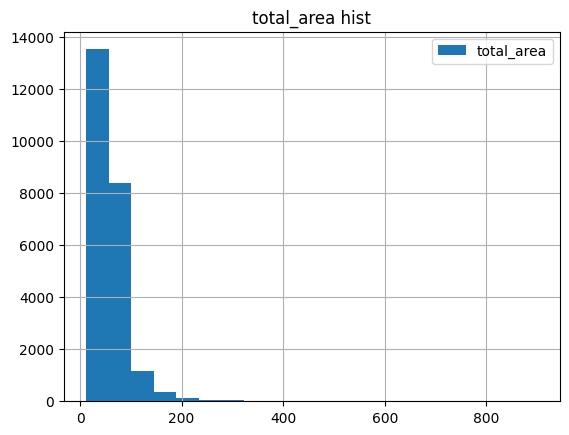

In [44]:
df2.total_area.hist(bins=20, legend=True).set(title='total_area hist');

Наблюдается очень сильный правый хвост, рассмотрим его.

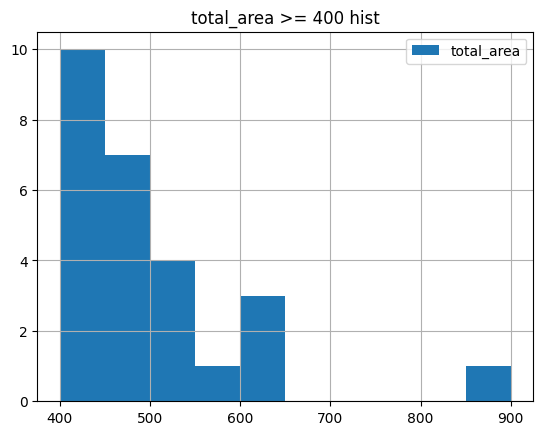

In [45]:
df2.total_area.hist(range=(400, df2.total_area.max()), legend=True).set(title='total_area >= 400 hist');

Сократим промежуток до площади 500+ и ознакомимся с данными.

In [46]:
df2.query('total_area >= 500').sort_values('sq_meter', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter,weekday,month,year,floor_type,kilometres_to_center
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,False,False,70.0,0,Санкт-Петербург,32440,5297,0,<NA>,2,198,111,485436.89,0,12,2017,другой,5
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706,7877,0,<NA>,2,318,106,466666.67,2,12,2017,последний,8
5893,3,230000000,500.0,2017-05-31,6,NaN,7,NaN,7,False,False,False,40.0,0,Санкт-Петербург,32440,5297,0,<NA>,2,198,50,460000.00,2,5,2017,последний,5
15016,8,150000000,500.0,2016-01-13,4,3.20,7,NaN,7,False,False,False,NaN,0,Санкт-Петербург,33058,6150,3,209,3,531,303,300000.00,2,1,2016,последний,6
3117,19,140000000,631.0,2019-03-30,7,NaN,5,NaN,5,False,False,False,60.0,0,Санкт-Петербург,25707,4972,0,<NA>,2,210,<NA>,221870.05,5,3,2019,последний,5
12859,20,140000000,631.2,2019-04-09,7,3.90,4,322.3,4,False,False,False,19.5,1,Санкт-Петербург,25707,4972,0,<NA>,2,210,<NA>,221799.75,1,4,2019,последний,5
8018,20,84000000,507.0,2015-12-17,5,4.45,7,301.5,7,True,False,False,45.5,1,Санкт-Петербург,<NA>,5735,2,110,0,<NA>,1078,165680.47,3,12,2015,последний,6
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447,4666,1,767,0,<NA>,14,110169.49,3,2,2019,другой,5
4237,1,50000000,517.0,2017-10-14,7,NaN,4,332.0,3,False,False,False,22.0,0,Санкт-Петербург,22835,1847,2,477,2,540,<NA>,96711.80,5,10,2017,другой,2


Наиболее странной строкой по категории `total_area` является предложение с 900 кв метров. Можно было бы предположить что оно не соответствует действительности, однако, несмотря на 25 этаж, однако цена за квадратный метр в целом соответствует дорогостоящему жилью исходя из данных. Для такого жилья цена зачастую сильно варьируется и отбрасывая её мы рискуем потерять важную информацию. Однако задачей проекта является построение алгоритма для вычисления мошенничества и аномалий, а такие объявления вполне рационально считать аномальными и рассматривать в отдельном порядке.

В целом, то же самое касается всех объявлений с площадью более 500, у них не наблюдается какого-то очивидного смыслогого выпадания, поэтому их не удасться восстановить, учитывая что их немного, мы можем их отбросить.

In [47]:
df2.drop(df2[df2.total_area >= 500].index, inplace=True)
df2.query('total_area >= 500').sort_values('sq_meter', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter,weekday,month,year,floor_type,kilometres_to_center


Ознакомимся с новой гистограммой.

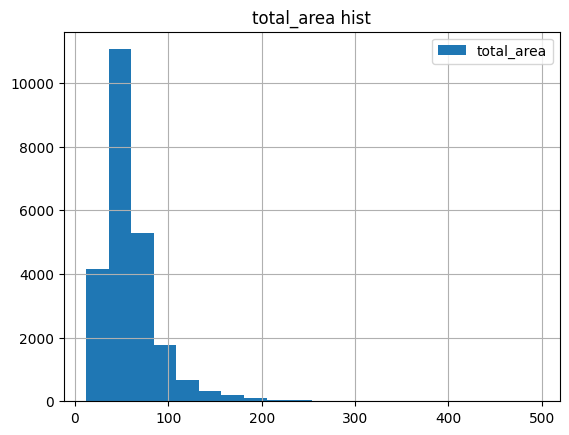

In [48]:
df2.total_area.hist(bins=20, legend=True).set(title='total_area hist');

Вид гистограммы не сильно изменился, по прежнему наблюдается очень сильный правый хвост, посмотрим имеет ли смысл урезать её дальше. Посчитаем количество значений выша 300 и 400.

In [49]:
len(df2.query('total_area >= 300').sort_values('sq_meter', ascending=False))

54

In [50]:
len(df2.query('total_area >= 400').sort_values('sq_meter', ascending=False))

17

До этого мы одбросили 9 значений, по сути объявив их аномалии, требующими ручной обработки. Отбросив еще 17 мы увеличим количество таких значений в 3 раза, 54 - в 7 раз. Учитывая что с другими категориями еще предстоит работать увелечении в 7 раз создаст слишком много аномалий, посмотрим оправдано ли увеличение в 3 раза построив гистограмму результата, не отбрасывая значений в таблице.

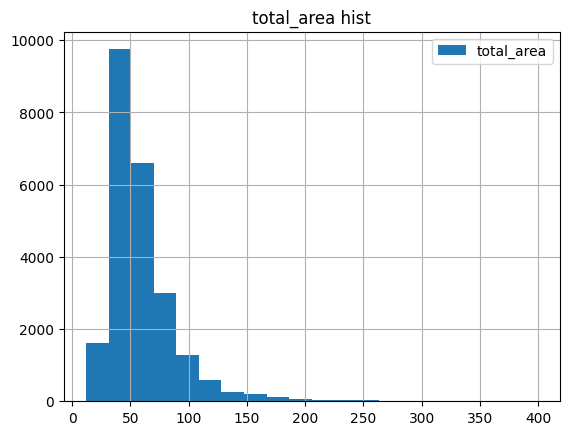

In [51]:
df2.drop(df2[df2.total_area >= 400].index).total_area.hist(bins=20, legend=True).set(title='total_area hist');


**Вывод**

Вид гистограммы значительно улучшился, в частности правый хвост стал более плавным а левая сторона больше похожа на распределение Пуассона и большая доля значений перекачевала из первой корзины во вторую. Финализируем изменения.

In [52]:
df2.drop(df2[df2.total_area >= 400].index, inplace=True)
df2.query('total_area >= 400').sort_values('sq_meter', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter,weekday,month,year,floor_type,kilometres_to_center


#### 4.1.2. <a id='toc4_1_2_'></a>[`living_area`](#toc0_)
Данный столбец, а так же столбец `kitchen_area` содержит пропуски, однако единственный способ их заполнить - медианы похожих категорий - в лучшем случае не внесут значительных изменений в гистограмму, поэтому обработаем их на основе имеющихся данных. Повторим алгоритм предыдущего пункта.

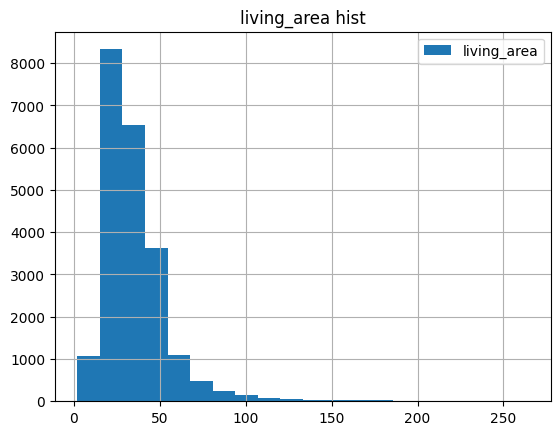

In [53]:
df2.living_area.hist(bins=20, legend=True).set(title='living_area hist');

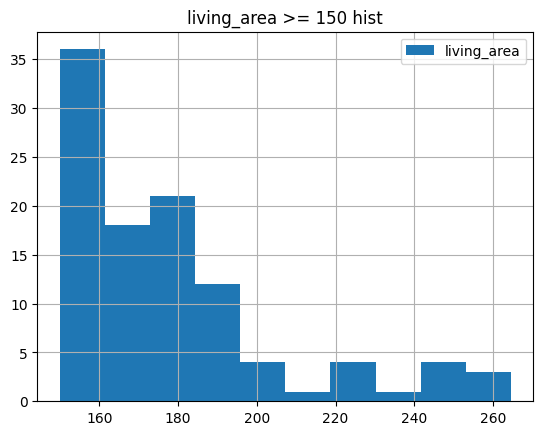

In [54]:
df2.living_area.hist(range=(150, df2.living_area.max()), legend=True).set(title='living_area >= 150 hist');

Видно что для 200 и более на каждую корзину приходиться меньше 5 значений, рассмотрим их.

In [55]:
len(df2.query('living_area >= 200'))

15

In [56]:
df2.query('living_area >= 200').sort_values('sq_meter', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter,weekday,month,year,floor_type,kilometres_to_center
7857,11,150000000,230.0,2017-10-25,8,NaN,8,220.0,8,False,False,False,NaN,0,Санкт-Петербург,25525,5845,2,116,0,<NA>,135,652173.91,2,10,2017,последний,6
19865,20,180000000,347.0,2015-01-21,8,3.90,6,260.0,3,False,False,False,45.0,0,Санкт-Петербург,23962,3794,2,537,3,501,834,518731.99,2,1,2015,другой,4
793,20,135000000,310.0,2018-05-22,4,3.30,5,250.0,2,False,False,False,50.0,0,Санкт-Петербург,34159,7251,2,295,3,190,342,435483.87,1,5,2018,другой,7
22907,9,65000000,228.0,2016-06-02,4,NaN,5,200.0,2,False,False,False,NaN,0,Санкт-Петербург,22783,1295,3,619,3,269,<NA>,285087.72,3,6,2016,другой,1
15701,12,83000000,293.6,2017-11-10,4,NaN,9,250.0,7,False,False,False,35.0,0,Санкт-Петербург,25593,5913,2,164,0,<NA>,<NA>,282697.55,4,11,2017,другой,6
1085,16,75000000,323.0,2017-07-10,5,4.00,5,255.7,4,False,False,False,66.0,0,Санкт-Петербург,23713,594,3,398,2,515,259,232198.14,0,7,2017,другой,1
1494,10,65000000,364.0,2018-11-27,7,3.90,6,250.0,3,False,False,False,20.0,0,Санкт-Петербург,21988,3254,0,<NA>,1,689,46,178571.43,1,11,2018,другой,3
20314,8,42000000,374.0,2017-04-09,7,NaN,4,239.4,3,False,False,False,51.0,0,Пушкин,15595,27749,3,62,3,274,9,112299.47,6,4,2017,другой,28
16915,14,29000000,292.2,2017-01-12,9,3.35,5,225.9,4,False,False,False,32.9,1,Санкт-Петербург,24892,5162,2,263,0,<NA>,825,99247.09,3,1,2017,другой,5
10246,10,25023000,253.7,2017-11-10,6,NaN,4,200.0,2,False,False,False,33.0,0,Санкт-Петербург,20687,1214,3,103,3,155,90,98632.24,4,11,2017,другой,1


Каких то очевидных способов восстановить значения не наблюдается, жил площадь недвижимости ниже общей площади, в некоторых случаях эти знчения слишком близки, что может говорить о том что жильё имеет нестандартную планировку, или имеет место быть ошибка, также три квартиры имеют сомнительно высоку цену за квадратный метр. В целом считаю что эти данные можно отбросить, сделаем это и построим гистограмму результат.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter,weekday,month,year,floor_type,kilometres_to_center


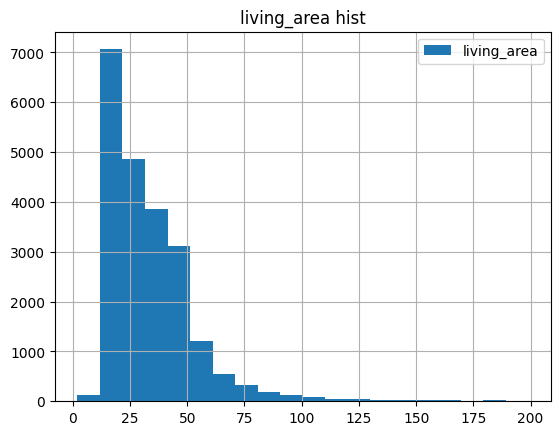

In [57]:
df2.drop(df2[df2.living_area >= 200].index, inplace=True)
df2.living_area.hist(bins=20, legend=True).set(title='living_area hist');
df2.query('living_area >= 200').sort_values('sq_meter', ascending=False)


**Вывод**

Вид гистограммы значительно улучшился, правая cторона более точно отражает распределение, левая сторона по прежнему имеет сильный разброс, однако я не считаю целесообразным еще больше урезать правый хвост т.к. данные содержат большой перечень жилья и из графика видно что количество значений маленькоое, но не настолько чтобы называть их выбросами.

#### 4.1.3. <a id='toc4_1_3_'></a>[`kitchen_area`](#toc0_)

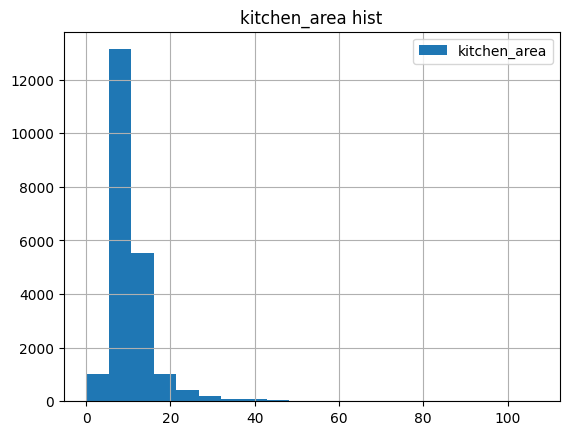

In [58]:
df2.kitchen_area.hist(bins=20, legend=True).set(title='kitchen_area hist');

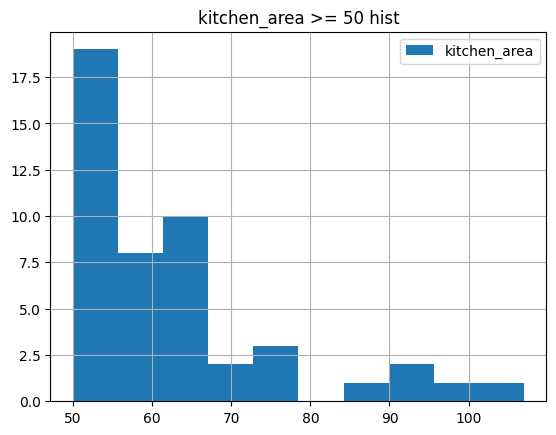

In [59]:
df2.kitchen_area.hist(range=(50, df2.kitchen_area.max()), legend=True).set(title='kitchen_area >= 50 hist');

Начиная с 70, каждая корзина содержит меньше 5 значений, посчитаем и рассмотрим их.

In [60]:
len(df2.query('kitchen_area >= 70'))

10

In [61]:
df2.query('kitchen_area >= 70').sort_values('sq_meter', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter,weekday,month,year,floor_type,kilometres_to_center
16647,15,122000000,145.0,2017-04-25,3,3.3,6,36.0,2,False,False,False,72.0,0,Санкт-Петербург,33931,7023,2,478,3,250,335,841379.31,1,4,2017,другой,7
16239,5,82400000,181.1,2017-05-24,3,3.9,9,58.2,4,False,False,False,93.2,0,Санкт-Петербург,25525,5845,2,116,0,<NA>,501,454997.24,2,5,2017,другой,6
16797,9,65850000,146.0,2017-07-14,2,NaN,9,40.0,3,False,False,False,93.0,0,Санкт-Петербург,25525,5845,2,116,0,<NA>,77,451027.40,4,7,2017,другой,6
492,18,95000000,216.0,2017-12-05,4,3.0,5,86.0,4,False,False,False,77.0,0,Санкт-Петербург,21740,436,2,138,3,620,14,439814.81,1,12,2017,другой,0
20215,2,85000000,249.7,2018-02-01,3,NaN,10,72.0,9,False,False,False,107.0,4,Санкт-Петербург,31532,4624,1,2218,2,99,26,340408.49,3,2,2018,другой,5
4394,20,57000000,174.0,2015-11-09,3,3.2,10,95.0,6,False,False,False,77.0,0,Санкт-Петербург,31706,4166,1,193,3,199,1039,327586.21,0,11,2015,другой,4
10867,1,56844500,177.9,2015-01-15,3,NaN,6,87.2,5,True,False,False,87.2,0,Санкт-Петербург,21860,318,2,160,3,569,<NA>,319530.64,3,1,2015,другой,0
14644,17,47000000,150.0,2017-02-28,4,3.7,6,58.0,5,False,False,False,75.0,1,Санкт-Петербург,16085,7616,0,<NA>,0,<NA>,507,313333.33,1,2,2017,другой,8
6193,19,24300000,230.0,2016-06-03,4,NaN,3,90.0,2,False,False,False,70.0,0,Санкт-Петербург,39422,15354,0,<NA>,1,345,397,105652.17,4,6,2016,другой,15
2489,9,12500000,255.0,2017-04-21,3,NaN,2,153.9,2,False,False,False,100.7,0,Санкт-Петербург,29544,6916,0,<NA>,3,198,102,49019.61,4,4,2017,последний,7


Можно предположить что для тех строк где `kitchen_area > living_area` значения перепутаны. Посчитаем такие строки в таблице.

In [62]:
len(df2.query('kitchen_area > living_area'))

355

Число кажеться большим, по сравнению с количеством выбросов, однако по сравнению с количеством строк в таблице, оно мало, что говорит о правдоподобности предположения что это ошибки ввода. Поменяем значения местами и посмотрим как это изменит хвост.

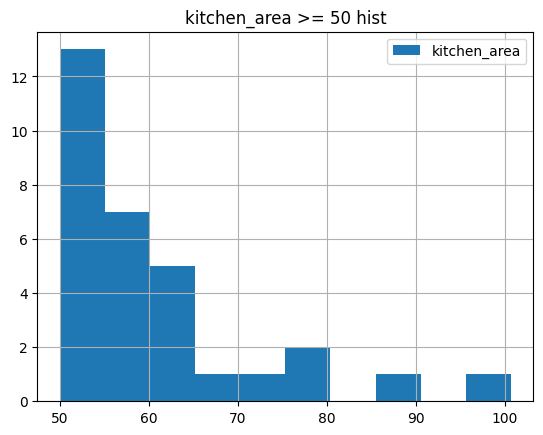

In [63]:
swap_la_ka = df2.loc[df2.kitchen_area > df2.living_area, ['living_area', 'kitchen_area']].copy()
swap_la_ka.columns = ['kitchen_area', 'living_area'] #swap column names
df2.loc[df2.kitchen_area > df2.living_area, ['living_area', 'kitchen_area']] = swap_la_ka
df2.kitchen_area.hist(range=(50, df2.kitchen_area.max()), legend=True).set(title='kitchen_area >= 50 hist');

Видно, что часть выбросов пропала, посмотрим на значения 65 и больше.

In [64]:
df2.query('kitchen_area >= 65').sort_values('sq_meter', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter,weekday,month,year,floor_type,kilometres_to_center
492,18,95000000,216.0,2017-12-05,4,3.0,5,86.0,4,False,False,False,77.0,0,Санкт-Петербург,21740,436,2,138,3,620,14,439814.81,1,12,2017,другой,0
20215,2,85000000,249.7,2018-02-01,3,NaN,10,107.0,9,False,False,False,72.0,4,Санкт-Петербург,31532,4624,1,2218,2,99,26,340408.49,3,2,2018,другой,5
4394,20,57000000,174.0,2015-11-09,3,3.2,10,95.0,6,False,False,False,77.0,0,Санкт-Петербург,31706,4166,1,193,3,199,1039,327586.21,0,11,2015,другой,4
10867,1,56844500,177.9,2015-01-15,3,NaN,6,87.2,5,True,False,False,87.2,0,Санкт-Петербург,21860,318,2,160,3,569,<NA>,319530.64,3,1,2015,другой,0
22980,19,24500000,155.4,2017-10-10,3,3.0,4,72.0,2,False,False,False,65.0,0,Санкт-Петербург,43758,15461,1,756,2,278,325,157657.66,1,10,2017,другой,15
18447,17,21800000,187.0,2018-01-14,5,NaN,4,120.0,4,False,False,False,65.0,0,Санкт-Петербург,43758,15461,1,756,2,278,<NA>,116577.54,6,1,2018,последний,15
6193,19,24300000,230.0,2016-06-03,4,NaN,3,90.0,2,False,False,False,70.0,0,Санкт-Петербург,39422,15354,0,<NA>,1,345,397,105652.17,4,6,2016,другой,15
2489,9,12500000,255.0,2017-04-21,3,NaN,2,153.9,2,False,False,False,100.7,0,Санкт-Петербург,29544,6916,0,<NA>,3,198,102,49019.61,4,4,2017,последний,7


Эти значения аномально велики и с точки зрения размера кухни и сточки зрения отношения плозади кухни к жилой площади. Отбросим их. Построим график - результат.

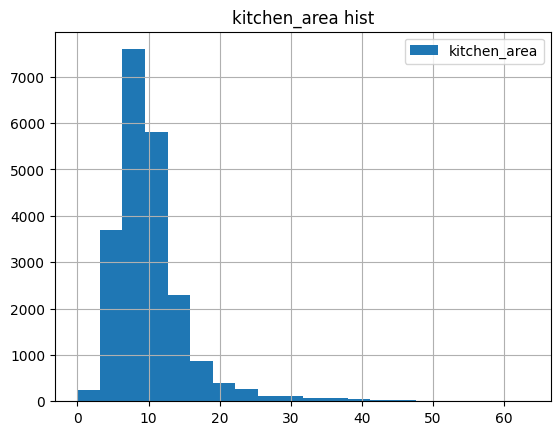

In [65]:
df2.drop(df2[df2.kitchen_area >= 65].index, inplace=True)
df2.kitchen_area.hist(bins=20, legend=True).set(title='kitchen_area hist');


**Вывод**


Нам удалось восстановить часть выбросов, распределение стало значительно более наглядным, это улучшит способность алгоритма анализировать данные в будущем.

#### 4.1.4. <a id='toc4_1_4_'></a>[`last_price`](#toc0_)

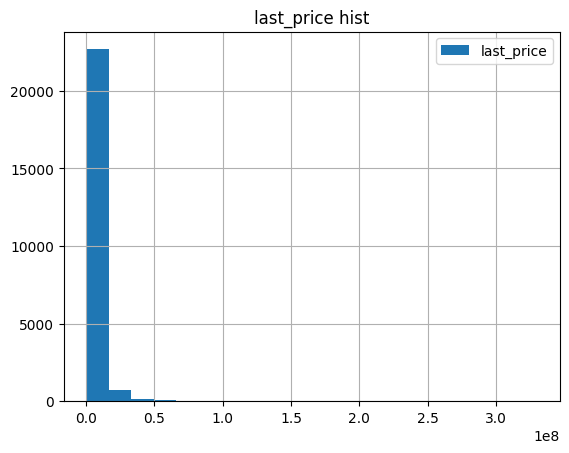

In [66]:
df2.last_price.hist(bins=20, legend=True).set(title='last_price hist');

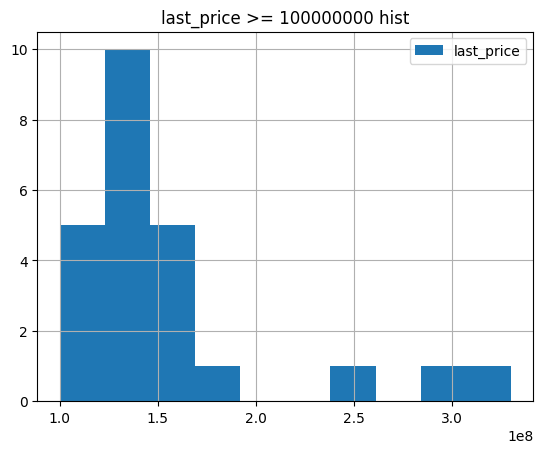

In [67]:
df2.last_price.hist(range=(100000000, df2.last_price.max()), legend=True).set(title='last_price >= 100000000 hist');

In [68]:
len(df2.query('last_price >= 150000000'))

8

In [69]:
df2.query('last_price >= 150000000').sort_values('sq_meter', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter,weekday,month,year,floor_type,kilometres_to_center
1436,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,False,False,False,40.0,0,Санкт-Петербург,23011,1197,3,519,3,285,233,1736842.11,2,4,2018,другой,1
22831,18,289238400,187.5,2019-03-19,2,3.37,6,63.7,6,False,False,False,30.2,0,Санкт-Петербург,22494,1073,3,386,3,188,<NA>,1542604.80,1,3,2019,последний,1
16461,17,245000000,285.7,2017-04-10,6,3.35,7,182.8,4,False,False,False,29.8,0,Санкт-Петербург,33143,6235,3,400,3,140,249,857542.88,0,4,2017,другой,6
8900,13,190870000,268.0,2016-03-25,3,NaN,8,132.0,7,False,False,False,40.0,0,Санкт-Петербург,32440,5297,0,<NA>,2,198,901,712201.49,4,3,2016,другой,5
2536,16,159984000,242.4,2015-08-27,4,3.85,9,131.0,7,False,False,False,20.0,0,Санкт-Петербург,21946,2242,1,679,1,227,501,660000.00,3,8,2015,другой,2
19155,20,160000000,243.0,2018-11-12,5,NaN,5,145.0,4,False,False,False,33.0,0,Санкт-Петербург,22640,555,3,285,1,200,18,658436.21,0,11,2018,другой,1
16495,12,159000000,260.0,2017-04-04,4,NaN,5,180.0,4,False,False,False,30.0,2,Санкт-Петербург,21740,436,2,138,3,620,178,611538.46,1,4,2017,другой,0
1026,20,155000000,310.0,2018-10-12,5,5.30,3,190.0,3,False,False,False,63.0,2,Санкт-Петербург,24899,4785,0,<NA>,1,603,<NA>,500000.00,4,10,2018,последний,5


Значения предсказуемо велики, однако для 4х самых больших имеет место огромный скачёк, отбросим их.

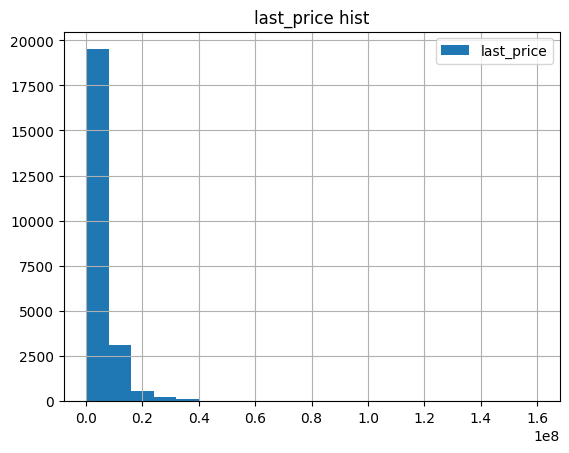

In [70]:
df2.drop(df2[df2.last_price >= 190000000].index, inplace=True)
df2.last_price.hist(bins=20, legend=True).set(title='last_price hist');


**Вывод**

читывая особенности цены элитного жилья - отсутствие как такогого потолка на неё - сложно отбрасывать больше значений, т.к. это грозит испортить данные. Возможно имеет смысл улучшить алгоритм используя функцию цены, нежели саму цену, или проконсультироваться с заказчиком на предмет требуется ли от алгоритма анализ элитного жилья. На данный момент оставим как есть.

#### 4.1.5. <a id='toc4_1_5_'></a>[`rooms`](#toc0_)

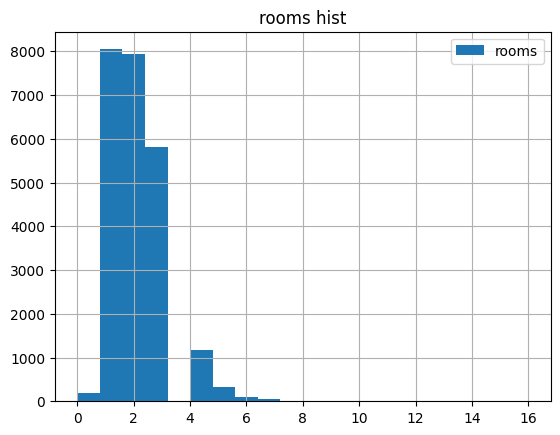

In [71]:
df2.rooms.hist(bins=20, legend=True).set(title='rooms hist');

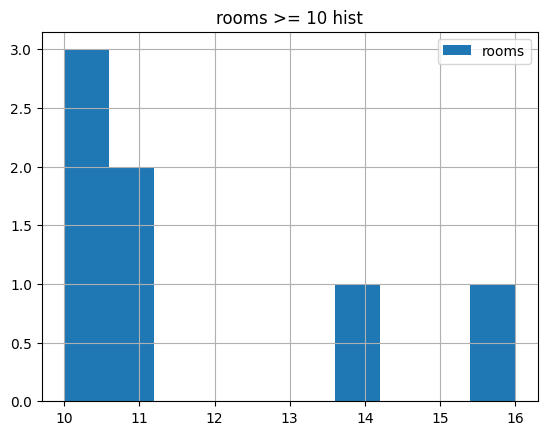

In [72]:
df2.rooms.hist(range=(10, df2.rooms.max()), legend=True).set(title='rooms >= 10 hist');

In [73]:
len(df2.query('rooms >= 10'))

7

In [74]:
df2.query('rooms >= 10').sort_values('sq_meter', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter,weekday,month,year,floor_type,kilometres_to_center
9688,8,33000000,194.1,2017-02-07,11,3.43,5,129.0,2,False,False,False,11.9,0,Санкт-Петербург,21469,1015,1,686,2,66,813,170015.46,1,2,2017,другой,1
18891,11,40000000,290.0,2016-06-21,10,3.50,6,189.4,6,False,False,False,30.0,1,Санкт-Петербург,26229,4932,3,316,1,227,77,137931.03,1,6,2016,последний,5
20829,6,28659000,245.4,2016-03-31,14,NaN,4,168.3,2,False,False,False,25.9,0,Санкт-Петербург,21104,2054,3,541,2,118,95,116784.84,3,3,2016,другой,2
18848,6,28500000,270.0,2015-03-02,16,3.00,4,180.0,4,False,False,False,13.0,1,Санкт-Петербург,23575,4142,1,516,0,<NA>,1365,105555.56,0,3,2015,последний,4
648,3,17500000,183.7,2018-07-01,11,3.40,7,138.8,7,False,False,False,13.3,0,Санкт-Петербург,23606,3148,0,<NA>,0,<NA>,<NA>,95264.02,6,7,2018,последний,3
4149,6,23000000,272.6,2018-01-11,10,3.14,7,145.9,7,False,False,False,18.8,1,Санкт-Петербург,10726,12169,1,191,1,531,<NA>,84372.71,3,1,2018,последний,12
18119,4,15500000,216.1,2016-07-04,10,3.15,5,161.4,2,False,False,False,19.8,0,Санкт-Петербург,24353,4921,1,368,0,<NA>,11,71726.05,0,7,2016,другой,5


В целом не удивительно, что размер, а соответственно и количество комнат, может сильно разниться, однако 14 и 16 это явные аномалии, отбросим их. Учитывая что максимально комнат всего 11, используем 10 корзин для построения гистограммы. 

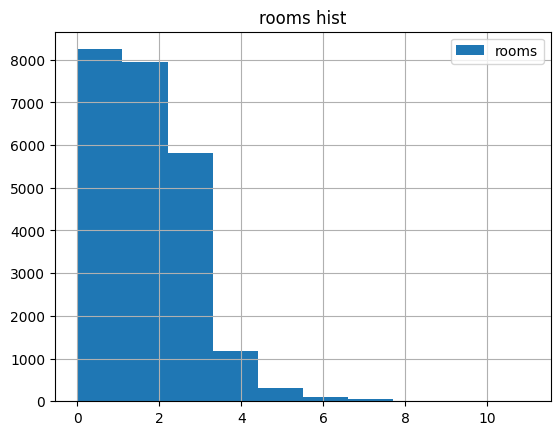

In [75]:
df2.drop(df2[df2.rooms >= 14].index, inplace=True)
df2.rooms.hist(bins=10, legend=True).set(title='rooms hist');

**Вывод**


Несмотря на небольшие изменения нам удалось значительно улучшить гистограмму.

#### 4.1.6. <a id='toc4_1_6_'></a>[`ceiling_height`](#toc0_)

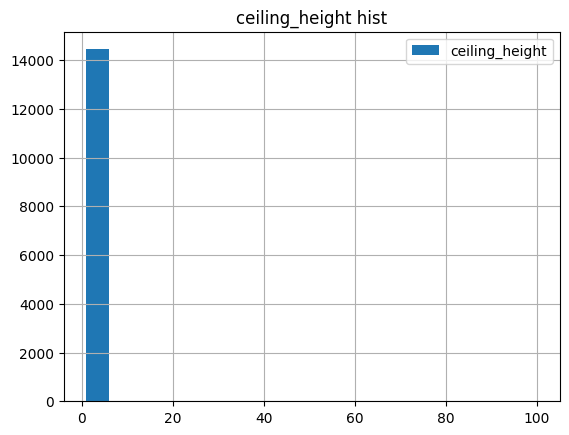

In [76]:
df2.ceiling_height.hist(bins=20, legend=True).set(title='ceiling_height hist');

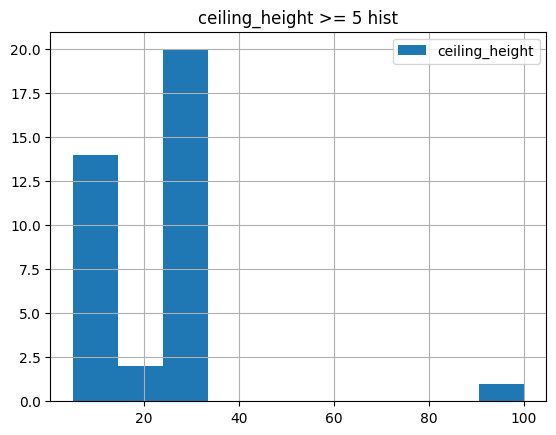

In [77]:
df2.ceiling_height.hist(range=(5, df2.ceiling_height.max()), legend=True).set(title='ceiling_height >= 5 hist');

In [78]:
len(df2.query('ceiling_height >= 5'))

37

In [79]:
df2.query('ceiling_height >= 5').sort_values('ceiling_height', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter,weekday,month,year,floor_type,kilometres_to_center
22869,0,15000000,25.0,2018-07-25,1,100.0,5,14.0,5,True,False,False,11.0,5,Санкт-Петербург,34963,8283,1,223,3,30,19,600000.00,2,7,2018,последний,8
22336,19,9999000,92.4,2019-04-05,2,32.0,6,55.5,5,False,False,False,16.5,4,Санкт-Петербург,18838,3506,0,<NA>,3,511,<NA>,108214.29,4,4,2019,другой,4
3148,14,2900000,75.0,2018-11-12,3,32.0,3,53.0,2,False,False,False,8.0,0,Волхов,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,38666.67,0,11,2018,другой,<NA>
21377,19,4900000,42.0,2017-04-18,1,27.5,24,37.7,19,False,False,False,11.0,2,Санкт-Петербург,42742,9760,0,<NA>,0,<NA>,61,116666.67,1,4,2017,другой,10
22938,14,4000000,98.0,2018-03-15,4,27.0,2,73.0,2,True,False,False,9.0,1,Нижняя,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,27,40816.33,3,3,2018,последний,<NA>
21824,20,2450000,44.0,2019-02-12,2,27.0,2,38.0,2,False,False,False,8.6,2,Большая Ижора,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,55681.82,1,2,2019,последний,<NA>
20478,11,8000000,45.0,2017-07-18,1,27.0,4,22.0,2,False,False,False,10.0,1,Санкт-Петербург,18975,3246,0,<NA>,3,449,429,177777.78,1,7,2017,другой,3
4876,7,3000000,25.0,2017-09-27,0,27.0,25,17.0,17,False,False,True,0.0,2,Мурино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,28,120000.00,2,9,2017,другой,<NA>
5246,0,2500000,54.0,2017-10-13,2,27.0,5,30.0,3,False,False,False,9.0,2,Мины,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,540,46296.30,4,10,2017,другой,<NA>
5807,17,8150000,80.0,2019-01-09,2,27.0,36,41.0,13,False,False,False,12.0,5,Санкт-Петербург,18732,20444,0,<NA>,3,80,38,101875.00,2,1,2019,другой,20


Имеет смысл так же рассмотреть слишком маленькие значения.

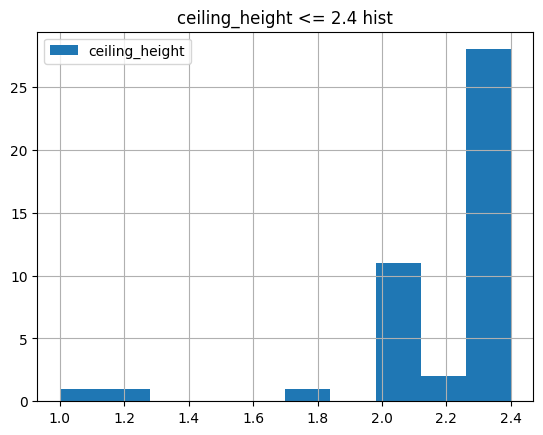

In [80]:
df2.ceiling_height.hist(range=(df2.ceiling_height.min(), 2.4), legend=True).set(title='ceiling_height <= 2.4 hist');

Для комнат 20.0 и выше будем считать, что имеет место быть ошибка ввода и разделим на 10.
Комнаты ниже 2.0 и выше 6.0 отбросим как аномалии.

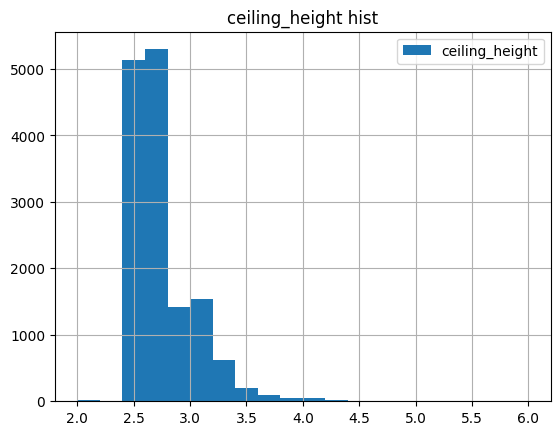

In [81]:
df2.ceiling_height.where(df2.ceiling_height < 20.0, df2.ceiling_height/10, inplace=True)
df2.drop(df2[df2.ceiling_height > 6 ].index, inplace=True)
df2.drop(df2[df2.ceiling_height < 2 ].index, inplace=True)
df2.ceiling_height.hist(bins=20, legend=True).set(title='ceiling_height hist');

**Вывод**

Нам удалось значительно улучшить репрезентативность выборки.

#### 4.1.7. <a id='toc4_1_7_'></a>[`floor_type`](#toc0_)

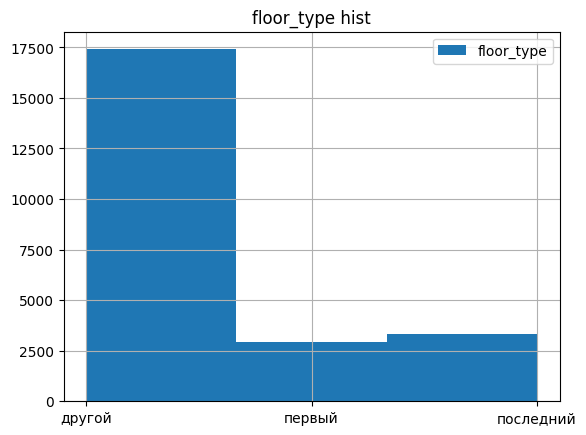

In [82]:
df2.floor_type.hist(bins=3, legend=True).set(title='floor_type hist');

**Вывод**

Данный столбец категориален, имеет только три значения, и учитывая, что мы создавали его вручную на основе данных из других стобцов и не включали аномальные значения не подлежит обработке. Возможно имеет смысл отбросить пропуски floors_total, однако это на данный момент в этом нет очевидной нужды.

#### 4.1.8. <a id='toc4_1_8_'></a>[`floors_total`](#toc0_)

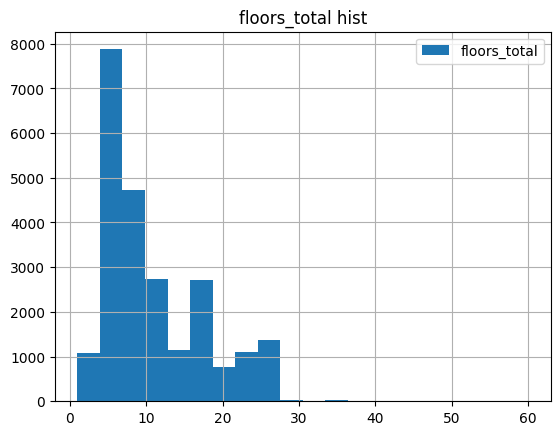

In [83]:
df2.floors_total.hist(bins=20, legend=True).set(title='floors_total hist');

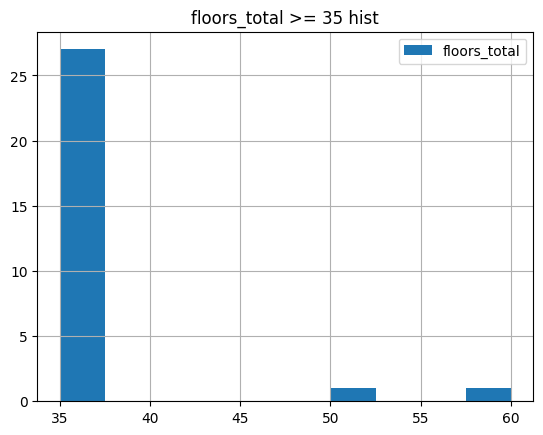

In [84]:
df2.floors_total.hist(range=(35, df2.floors_total.max()), legend=True).set(title='floors_total >= 35 hist');

In [85]:
len(df2.query('floors_total >= 35'))

29

In [86]:
df2.query('floors_total >= 35').sort_values('floors_total', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter,weekday,month,year,floor_type,kilometres_to_center
2253,12,3800000,45.5,2018-06-28,2,2.88,60,27.4,4,False,False,False,7.4,0,Кронштадт,67763,49488,2,342,3,614,166,83516.48,3,6,2018,другой,49
16731,9,3978000,40.0,2018-09-24,1,2.65,52,14.0,18,False,False,False,10.5,0,Санкт-Петербург,20728,12978,1,793,0,<NA>,45,99450.00,0,9,2018,другой,13
397,15,5990000,54.0,2018-03-22,2,NaN,36,21.4,28,False,False,False,18.7,1,Санкт-Петербург,18732,20444,0,<NA>,3,80,11,110925.93,3,3,2018,другой,20
5807,17,8150000,80.0,2019-01-09,2,2.70,36,41.0,13,False,False,False,12.0,5,Санкт-Петербург,18732,20444,0,<NA>,3,80,38,101875.00,2,1,2019,другой,20
11079,16,9200000,75.0,2019-02-22,2,2.70,36,40.0,29,False,False,False,12.0,2,Санкт-Петербург,18732,20444,0,<NA>,3,80,<NA>,122666.67,4,2,2019,другой,20
12888,7,7600000,70.0,2016-11-18,3,2.70,35,36.5,27,False,False,False,23.1,2,Санкт-Петербург,18732,20444,0,<NA>,3,80,413,108571.43,4,11,2016,другой,20
21809,20,10600000,77.0,2019-04-16,2,NaN,35,39.0,11,False,False,False,14.0,2,Санкт-Петербург,18732,20444,0,<NA>,3,80,<NA>,137662.34,1,4,2019,другой,20
21599,12,6200000,51.0,2017-08-27,2,NaN,35,27.0,13,False,False,False,19.0,0,Санкт-Петербург,18732,20444,0,<NA>,3,80,<NA>,121568.63,6,8,2017,другой,20
20938,18,9900000,100.9,2019-04-08,3,NaN,35,53.4,22,False,False,False,13.4,0,Санкт-Петербург,18732,20444,0,<NA>,3,80,<NA>,98116.95,0,4,2019,другой,20
18629,20,5700000,54.0,2017-12-08,1,NaN,35,21.0,31,False,False,False,18.0,0,Санкт-Петербург,18732,20444,0,<NA>,3,80,128,105555.56,4,12,2017,другой,20


60 и 52 этажа аномалии. уверенно сказать чем вызваны ну удасться, отбросим.

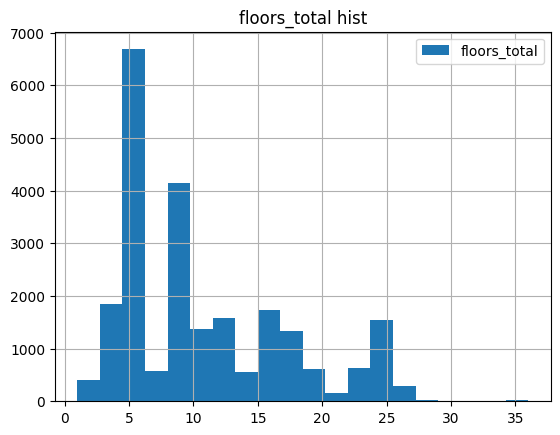

In [87]:
df2.drop(df2[df2.floors_total > 36 ].index, inplace=True)
df2.floors_total.hist(bins=20, legend=True).set(title='floors_total hist');

**Вывод**

Нам удалось значительно улучшить репрезентативность выборки.

#### 4.1.9. <a id='toc4_1_9_'></a>[`cityCenters_nearest`](#toc0_)

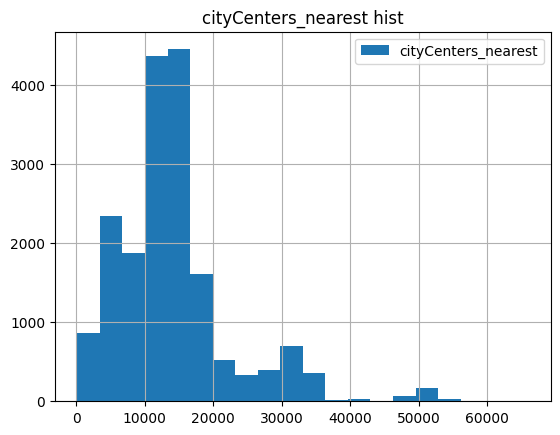

In [88]:
df2.cityCenters_nearest.hist(bins=20, legend=True).set(title='cityCenters_nearest hist');

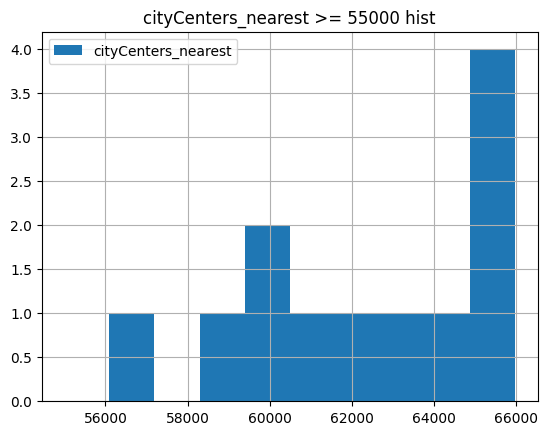

In [89]:
df2.cityCenters_nearest.hist(range=(55000, df2.cityCenters_nearest.max()), legend=True).set(title='cityCenters_nearest >= 55000 hist');

In [90]:
len(df2.query('cityCenters_nearest >= 55000'))

12

In [91]:
df2.query('cityCenters_nearest >= 55000').sort_values('cityCenters_nearest', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter,weekday,month,year,floor_type,kilometres_to_center
9640,8,4200000,51.4,2014-12-10,2,2.55,5,31.0,2,False,False,False,6.0,1,Молодежное,84869,65968,0,<NA>,0,<NA>,1194,81712.06,2,12,2014,другой,66
5340,19,3600000,50.6,2019-03-19,2,2.50,5,29.9,4,False,False,False,7.0,1,Молодежное,84853,65952,0,<NA>,0,<NA>,<NA>,71146.25,1,3,2019,другой,66
577,7,4000000,59.0,2017-07-23,3,2.50,5,37.0,1,False,False,False,7.0,0,Молодежное,84665,65764,0,<NA>,0,<NA>,<NA>,67796.61,6,7,2017,первый,66
20746,1,3300000,43.5,2016-02-16,2,2.55,4,27.2,2,False,False,False,5.0,1,Молодежное,84006,65105,0,<NA>,0,<NA>,1043,75862.07,1,2,2016,другой,65
5218,15,3650000,53.8,2018-09-24,3,2.50,4,36.9,3,False,False,False,5.2,0,Молодежное,83758,64857,0,<NA>,0,<NA>,121,67843.87,0,9,2018,другой,65
18884,15,3600000,57.6,2019-02-08,3,2.55,3,41.3,2,False,False,False,6.5,1,Зеленогорск,81607,62706,0,<NA>,0,<NA>,13,62500.00,4,2,2019,другой,63
2974,13,3200000,46.3,2018-03-31,2,2.50,3,29.2,2,False,False,False,7.0,1,Зеленогорск,81355,62454,0,<NA>,0,<NA>,205,69114.47,5,3,2018,другой,62
16569,13,3200000,52.8,2017-06-20,2,2.55,5,29.9,3,False,False,False,8.3,0,Ломоносов,53042,61495,2,223,0,<NA>,240,60606.06,1,6,2017,другой,61
23123,0,1800000,32.0,2018-07-17,1,NaN,2,17.0,1,False,False,False,6.0,0,Ломоносов,56896,60223,1,17,0,<NA>,147,56250.00,1,7,2018,первый,60
4441,6,2300000,31.0,2016-05-26,1,NaN,3,12.0,1,False,False,False,9.0,0,Зеленогорск,78527,59626,0,<NA>,0,<NA>,232,74193.55,3,5,2016,первый,60


**Вывод**

Данная недвижимость находится в посёлке Молодежное, Зеленогорске и Ломоносове, данные нас. пункты действительно наиболее удалённые от центра Санкт-Петербурга. Сложно их назвать аномалиями, оставим их.

#### 4.1.10. <a id='toc4_1_10_'></a>[`parks_nearest`](#toc0_)

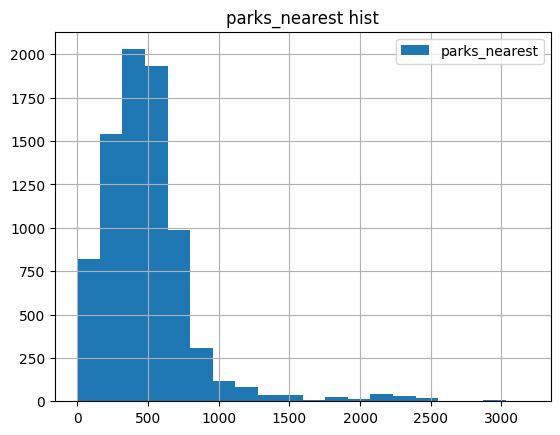

In [92]:
df2.parks_nearest.hist(bins=20, legend=True).set(title='parks_nearest hist');

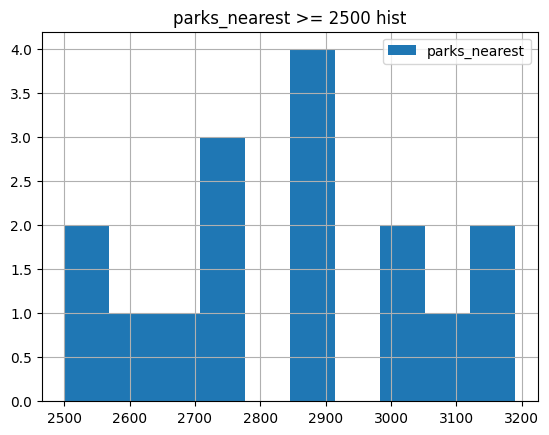

In [93]:
df2.parks_nearest.hist(range=(2500, df2.parks_nearest.max()), legend=True).set(title='parks_nearest >= 2500 hist');

In [94]:
len(df2.query('parks_nearest >= 2500'))

16

In [95]:
df2.query('parks_nearest >= 2500').sort_values('parks_nearest', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter,weekday,month,year,floor_type,kilometres_to_center
10959,9,3000000,31.1,2017-03-21,1,NaN,5,17.7,2,False,False,False,5.5,0,Санкт-Петербург,14821,9734,0,3190,1,431,234,96463.02,1,3,2017,другой,10
19430,9,3900000,30.5,2018-02-22,1,2.60,5,16.5,1,False,False,False,5.5,0,Санкт-Петербург,14821,9734,0,3190,1,431,176,127868.85,3,2,2018,первый,10
1590,3,7500000,70.0,2017-07-11,2,NaN,18,37.0,13,False,False,False,10.0,0,Санкт-Петербург,14878,9791,0,3064,1,264,4,107142.86,1,7,2017,другой,10
19208,17,14950000,187.0,2017-10-12,5,3.00,2,80.0,2,False,False,False,17.0,1,Санкт-Петербург,36805,8656,0,3013,3,537,49,79946.52,3,10,2017,последний,9
23080,15,4650000,44.5,2018-02-20,2,NaN,5,25.2,2,False,False,False,5.5,1,Санкт-Петербург,14965,9877,1,2984,1,284,152,104494.38,1,2,2018,другой,10
2659,9,19150000,104.9,2017-08-28,3,3.00,5,61.5,4,False,False,False,13.5,1,Санкт-Петербург,36850,9016,1,2905,3,137,91,182554.81,0,8,2017,другой,9
1860,19,3500000,45.0,2016-12-05,2,NaN,5,29.1,3,False,False,False,6.0,1,Санкт-Петербург,15070,9983,1,2888,1,409,473,77777.78,0,12,2016,другой,10
7855,16,5200000,44.9,2019-03-04,2,2.53,5,29.0,3,False,False,False,5.5,1,Санкт-Петербург,15059,9972,1,2880,1,357,<NA>,115812.92,0,3,2019,другой,10
3865,20,11900000,91.2,2018-10-04,3,3.10,4,62.0,3,False,False,False,10.6,0,Санкт-Петербург,36781,8791,1,2847,3,370,<NA>,130482.46,3,10,2018,другой,9
22003,9,14166000,78.7,2019-04-04,2,2.95,5,38.0,2,False,False,False,18.1,1,Санкт-Петербург,37028,8879,1,2768,3,487,9,180000.00,3,4,2019,другой,9


**Вывод**

Здесь имеет место достаточно сильное отклонение от центра, однако оно также сравнительно плавное и сложно назвать аномальными такие значения. Оставим их.

#### 4.1.11. <a id='toc4_1_11_'></a>[Заключение](#toc0_)
Обрабатывая категории данных можно обнаружить и устранить аномалии отбрасывая и/или восстанавливая значения, тем самым мы увеличиваем не только распределения данных в той или иной категории, но и качество данных, репрезентативность в целом. Однако необходимо быть осторожным, т.к. каждая строка представляет полезную информацию и отбрасывая слишком много мы рискуем исказить общую картину до неузнаваемости. Оценим как изменилась общая информация после удаления статистических выбросов, посчитаем количество записей и сравним с оригинальными данными.

In [96]:
len(df1)

23699

In [97]:
len(df2)

23632

In [98]:
1 - len(df2)/len(df1)

0.00282712350732095

**Вывод**

Изначально у нас было 23699 записей, после измененй 23632, таким образом отбросив всего лишь  ~0.3% данных мы значительно улучшили репрезентативность данных по ряду категорий.

## 5. <a id='toc5_'></a>[Cкорость продажи квартир](#toc0_)
В данном разделе нам предстоит проанализировать скорость продажи квартир на основании `days_exposition` отражающих количество дней от даты публикации до даты снятия. Снятие может происходить не только по факту продажи, но мы будем считать каждое снятое объявление продажей. Ознакомимся с данными, построим гистограмму, рассчитаем среднее и медиану.

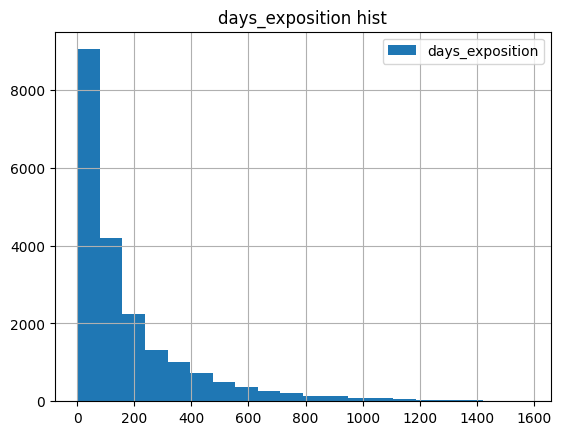

In [99]:
df2.days_exposition.hist(bins=20, legend=True).set(title='days_exposition hist');

Очень много значений в начале, рассмотрим поближе.

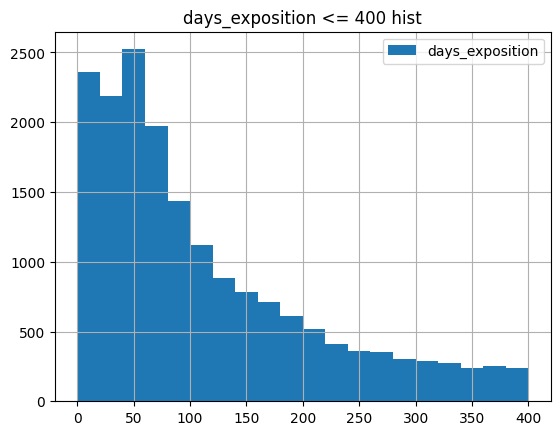

In [100]:
df2.days_exposition.hist(bins=20, range=(0, 400), legend=True).set(title='days_exposition <= 400 hist');

Среднее и медиана

In [101]:
df2.days_exposition.agg(['mean','median'])

mean      180.685823
median     95.000000
Name: days_exposition, dtype: float64

Рассмотрим правый хвост.

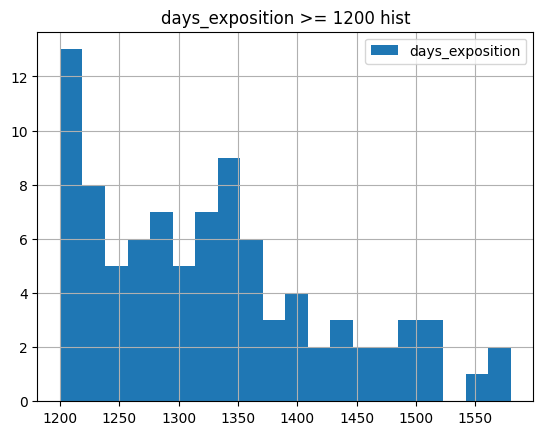

In [102]:
df2.days_exposition.hist(bins=20, range=(1200, df2.days_exposition.max()), legend=True).set(title='days_exposition >= 1200 hist');

Есть несколько выбросов, проанализируем их

In [103]:
df2.query('days_exposition > 1500')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter,weekday,month,year,floor_type,kilometres_to_center
1109,1,34878556,95.80,2014-12-09,2,NaN,6,58.30,5,True,False,False,20.00,1,Санкт-Петербург,21860,318,2,160,3,569,1572,364076.78,1,12,2014,другой,0
1885,2,13300000,79.60,2014-12-09,2,3.00,8,42.70,7,False,False,False,18.00,0,Санкт-Петербург,39393,11096,1,537,0,<NA>,1513,167085.43,1,12,2014,другой,11
6691,3,4400000,42.98,2014-12-12,1,NaN,5,18.72,1,False,False,False,11.31,0,Пушкин,19715,30358,1,439,3,232,1512,102373.20,4,12,2014,первый,30
9553,11,10600000,80.00,2014-12-09,3,2.85,17,44.00,9,False,False,False,15.00,0,Санкт-Петербург,17101,17110,0,<NA>,0,<NA>,1553,132500.00,1,12,2014,другой,17
18843,11,3500000,48.20,2014-12-15,2,2.50,5,27.40,2,False,False,False,7.70,3,Новое Девяткино,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1580,72614.11,0,12,2014,другой,<NA>
20969,18,13300000,133.00,2015-02-11,4,3.00,5,58.00,2,False,False,False,45.00,0,Санкт-Петербург,24653,5032,0,<NA>,1,534,1512,100000.00,2,2,2015,другой,5


Сравним медианные значения по всей таблице с медианой данных значений.

In [104]:
too_long_exp = df2.query('days_exposition > 1500')[['days_exposition', 'last_price', 'sq_meter']].agg('median').T
too_long_exp = pd.concat([df2[['days_exposition', 'last_price', 'sq_meter']].agg('median').T, too_long_exp], axis=1)
too_long_exp.columns = ['All_median','exposition_longer_1500_median']
too_long_exp.style.format('{:_.0f}')

,All_median,exposition_longer_1500_median
days_exposition,95,1_533
last_price,4_622_500,11_950_000
sq_meter,94_937,117_437


Видно что для крайних значений `days_exposition` и цена в цулом, и цена за квадратный метр значительно выше данных по всей таблице. Можно говорить о том что именно эта завышенная цена является вероятной причиной отсутствия спроса. Однако особый интерес представляют записи 1109, 1885, 9553. Задача поставленная заказчиком выявлять аномалии и противодействия мошенничеству, эти записи имеют не только аномально высокие значения `sq_meter` - цены за квадратный метр, даже для данной выборки, но и все выставлены в один день `2014-12-09`.

Посмотрим сколько записей у нас есть для этого дня.

In [105]:
len(df2.query('first_day_exposition == 20141209'))

33

Здесь слишком много значений чтобы обрабатывать их вручную, посмотрим на количество записей этого дня с `sq_meter` выше 3го квартиля.

In [106]:
df2.sq_meter.quantile(.75)

114133.17499999999

In [107]:
len(df2.query('first_day_exposition == 20141209 and sq_meter > @df2.sq_meter.quantile(.75)'))

29

Повысим порог до 90%. 

In [108]:
len(df2.query('first_day_exposition == 20141209 and sq_meter > @df2.sq_meter.quantile(.9)'))

24

По прежнему обсурдно большое количество значений, данный день - аномалия, возможно связанная с мошшеничеством, отбросим его значения.

In [109]:
df2.shape[0]

23632

In [110]:
df2.drop(df2[df2.first_day_exposition == '20141209'].index, inplace=True)
df2.shape[0]

23599

**Вывод**

Гистограмма имеет очень большое количество значений в начале, которое резко падает а потом растягивается до значений в разы превосходящие значения в начале, это говорит о том что большинство квартир продаётся сравнительно быстро, однако оставшиеся могут задержаться на рынке очень надолго.

Гистограмма в ограниченном диапазоне а также медиана показывают что быстрыми можно называть продажи которые происходят в первые 95-100, дней, т.е. те которые в распределении находятся слева от медианы. Среднее значение сильно искажено длительными продажами, и можно говорить, что на основе данных гистограмм, те объявления, которые находятся на рынке более 180-200 дней, рискуют остаться без покупателей на очень долгое время.

В ходе анализа выбросов обнаружился ряд аномальных значений, исследование которых привёло к выявлению аномальной даты с большим количеством значений резко выпадающих из статистической нормы, данные значения следует рассматривать вручную, т.к. они создают искажение данных. Вследствии чего, они были отброшены.

## 6. <a id='toc6_'></a>[Зависимость стоимости квартир от разных факторов.](#toc0_)
От нас требуется рассмотреть влияния ряда факторов на стоимость квартир - `last_price`, в частности:

* общей площади - `total_area`
* жилой площади - `living_area`
* площади кухни - `kitchen_area`
* количества комнат - `rooms`
* тип этажа - `floor_type`
* дата размещения - `first_day_exposition` :
    - день недели - `weekday`
    - месяц размещения - `month`
    - год - `year`

В качестве инструментов анализа нам помогут графики, а также группировка значений по категориям в рамках этих параметров. Первые четыре фактора количественные, мы можем воспользоваться корреляцей для их анализа. Последние четыре категорические - там применить корреляцию не получиться. Данные о дате размещения можно сделать количественными учтя время которое прошло с момента публикации, однако без факта продажи така трансформация не будет оправданным источником информации, поэтому мы не будем этого делать.

### 6.1. <a id='toc6_1_'></a>[Численные характеристики](#toc0_)

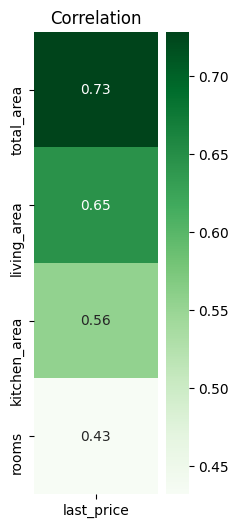

In [111]:
fig1, ax1 = plt.subplots(figsize=(2,6))
price_corr = pd.DataFrame(df2[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr()['last_price'].drop('last_price'))
sns.heatmap(price_corr, annot=True, cmap='Greens', ax=ax1, fmt='.2f').set(title='Correlation');


Корреляция наглядно говорит о том что есть значительная зависимость цены от общей площади, низкая значительность цены от жилой площади, зависимости от количества комнат и размера кухни не наблюдается. Рассмотрим эти характеристики подробнее.

### 6.2. <a id='toc6_2_'></a>[Общая площадь и жилая площадь](#toc0_)

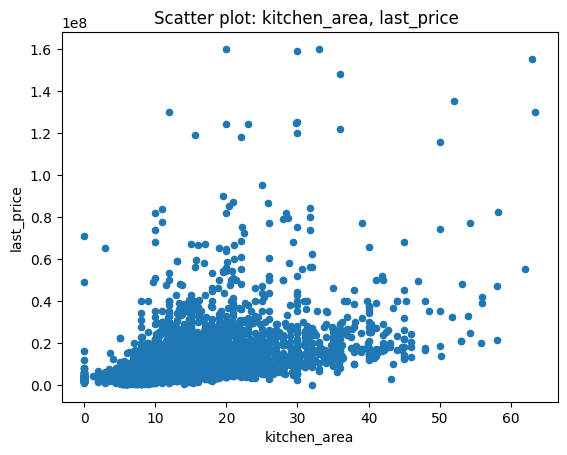

In [112]:
df2.plot.scatter('kitchen_area', 'last_price').set(title='Scatter plot: kitchen_area, last_price ');

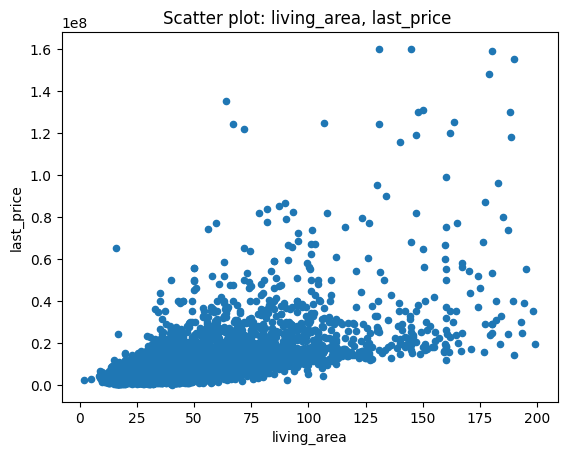

In [113]:
df2.plot.scatter('living_area', 'last_price').set(title='Scatter plot: living_area, last_price ');

На обоих графиках видно что зависимость наиболее велика для значений площадей меньше среднего, где сравнительно мало значений выпадает из конуса. У остальной недвижимости данная связь теряется и мы наблюдаем резкое падение корреляции и увеличение рассеяния.

### 6.3. <a id='toc6_3_'></a>[Площадь кухни](#toc0_)

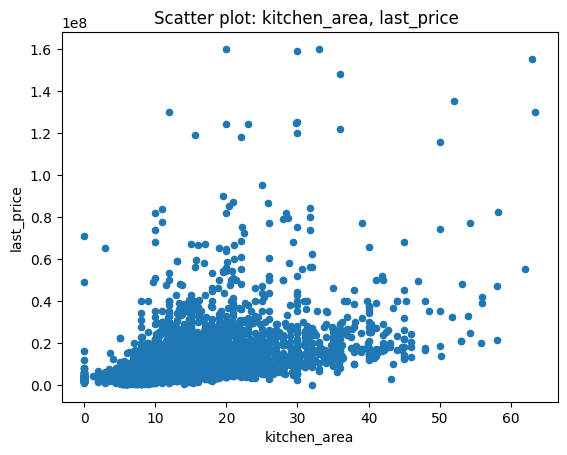

In [114]:
df2.plot.scatter('kitchen_area', 'last_price').set(title='Scatter plot: kitchen_area, last_price ');

Здесь мы наблюдаем похожую картину, однако даже в первой половине графика по площади кухни наблюдается лишь низкая зависимость.

### 6.4. <a id='toc6_4_'></a>[Количество комнат](#toc0_)

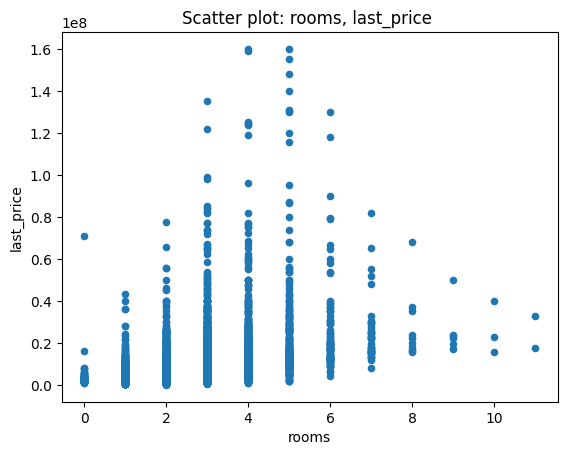

In [115]:
df2.plot.scatter('rooms', 'last_price', title='Scatter plot: rooms, last_price ');

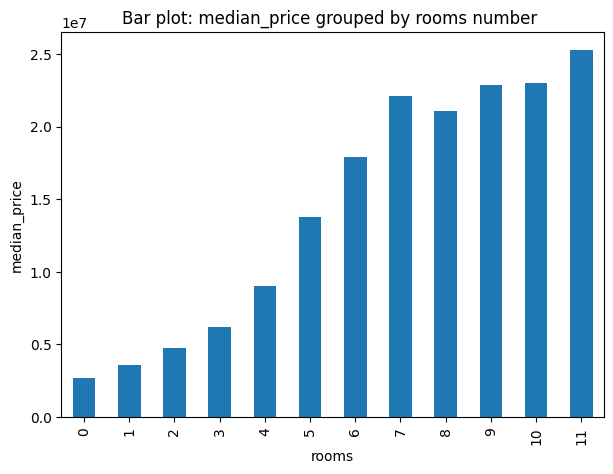

In [116]:
df2.groupby('rooms').last_price.median().plot.bar(ylabel='median_price', figsize = (7,5), title='Bar plot: median_price grouped by rooms number ');

Для того чтобы рассмотреть количество комнат как следует нам потребовалось два графика - первый показал что нет чёткой зависимости цены от количества комнат, высоокие цены сконцентрированы ближе к среднему количеству комнат, второй - что  цена растёт с колиеством комнат для первой половины графика, но не для второй, этот рост скорее объясняется ростом общей площади чем непосредственно количества комнат.

### 6.5. <a id='toc6_5_'></a>[Категориальные характеристики](#toc0_)

Анализируя категориальные характеристики имеет смысл посмотреть количество записей в каждой категории, доля продаж, а также медианы для них.

### 6.6. <a id='toc6_6_'></a>[Тип этажа](#toc0_)

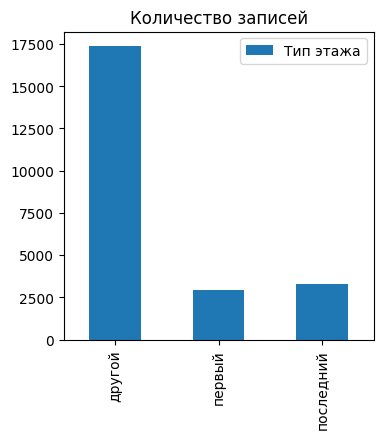

In [117]:
df2.groupby('floor_type').count().plot.bar(y='floor', ylabel='', xlabel='', figsize=(4,4), title='Количество записей').legend(['Тип этажа']);

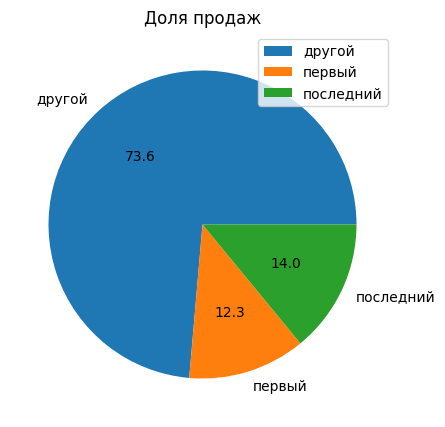

In [118]:
df2.groupby('floor_type').count().plot.pie(y='floor', ylabel='', autopct='%.1f', figsize=(6,5), title='Доля продаж');

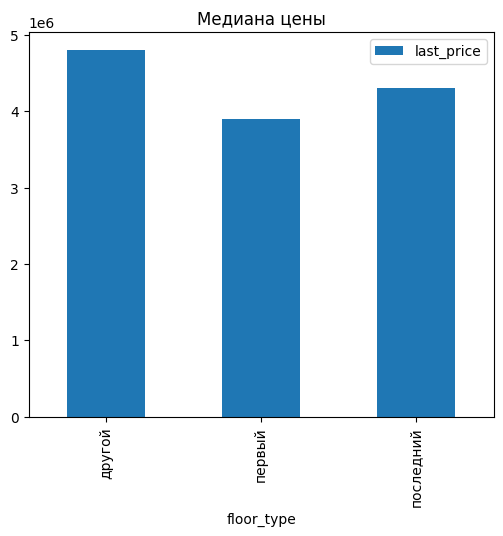

In [119]:
df2.groupby('floor_type').median().plot.bar(y='last_price', ylabel='', figsize=(6,5), title='Медиана цены');

Предсказуемо, большинство продаж приходятся на этажи между первым и последним, но у нас достаточно наблюдений чтобы сказать что в целом люди отдают меньше всего за квартиры на первом этаже, более охотно покупают последний, но самым большим спросом пользуются остальные этажи.

### 6.7. <a id='toc6_7_'></a>[День недели](#toc0_)

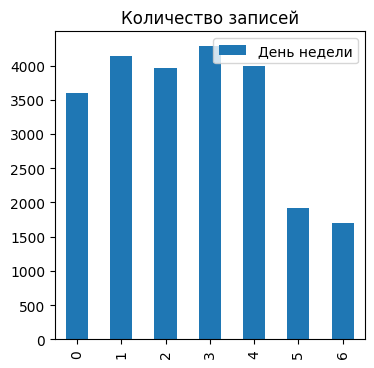

In [120]:
df2.groupby('weekday').count().plot.bar(y='floor', ylabel='', xlabel='', figsize=(4,4), title='Количество записей').legend(['День недели']);

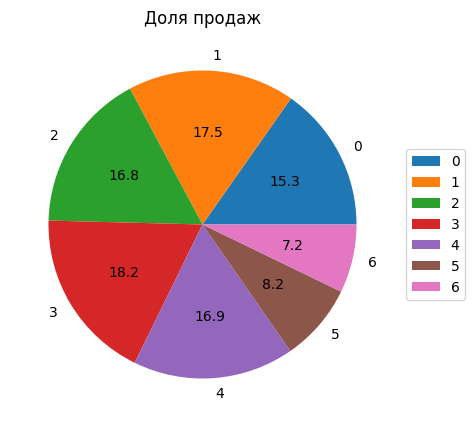

In [121]:
ax1 = df2.groupby('weekday').count().plot.pie(y='floor', ylabel='', autopct='%.1f', figsize=(6,5), title='Доля продаж');
ax1.axes.legend(loc='right', bbox_to_anchor=(1.2, 0.5));

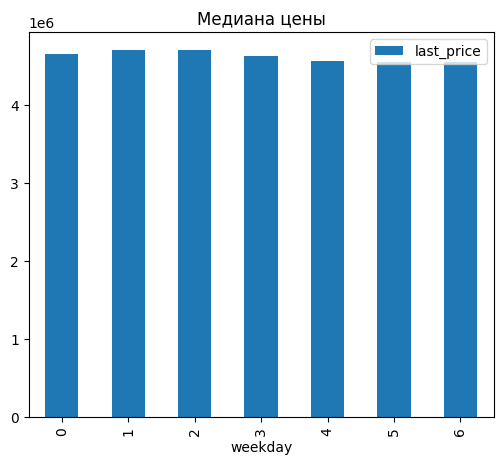

In [122]:
df2.groupby('weekday').median().plot.bar(y='last_price', ylabel='', figsize=(6,5), title='Медиана цены');

Цена не зависит от дня недели, предсказуемо, меньше объявлений размещается на выходных.

### 6.8. <a id='toc6_8_'></a>[Месяц](#toc0_)

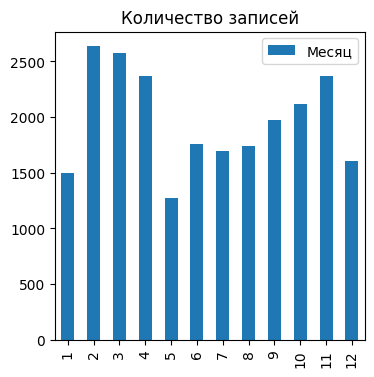

In [123]:
df2.groupby('month').count().plot.bar(y='floor', ylabel='', xlabel='', figsize=(4,4), title='Количество записей').legend(['Месяц']);

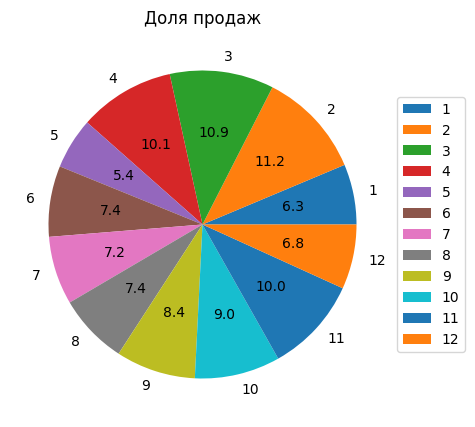

In [124]:
ax1 = df2.groupby('month').count().plot.pie(y='floor', ylabel='', autopct='%.1f', figsize=(6,5), title='Доля продаж');
ax1.axes.legend(loc='right', bbox_to_anchor=(1.2, 0.5));

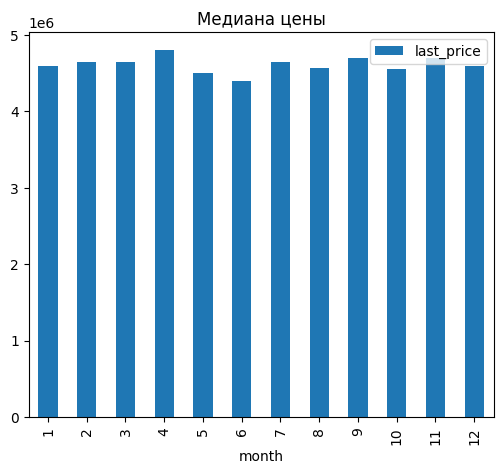

In [125]:
df2.groupby('month').median().plot.bar(y='last_price', ylabel='', figsize=(6,5), title='Медиана цены');

В течении года цена колеблется с пиками в апреле и сентябре и минимумом в июне, однако в целом значительной зависимости нет.

### 6.9. <a id='toc6_9_'></a>[Год](#toc0_)

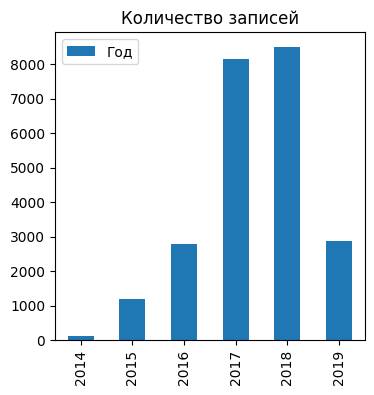

In [126]:
df2.groupby('year').count().plot.bar(y='floor', ylabel='', xlabel='', figsize=(4,4), title='Количество записей').legend(['Год']);

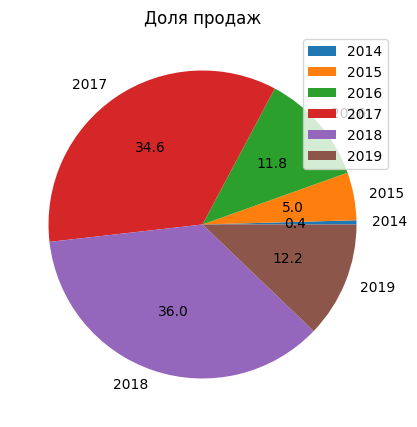

In [127]:
df2.groupby('year').count().plot.pie(y='floor', ylabel='', autopct='%.1f', figsize=(6,5), title='Доля продаж');

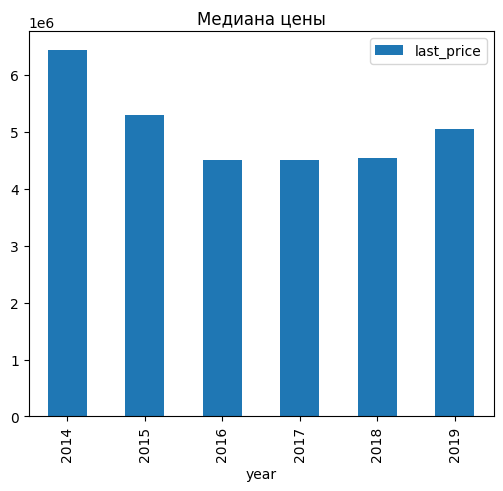

In [128]:
df2.groupby('year').median().plot.bar(y='last_price', ylabel='', figsize=(6,5), title='Медиана цены');

Последний график обманчив, несмотря на высокую, казалось бы, цену, у нас недостаточно наблюдений по 2014 году чтобы говорить об изменениях стоимости, в меньшей степени это касается 2015 года, однако этот год, и все последующие, испытывали сравнительно небольшие колебания в цене - опустившись после 15 года она вновь поднялась в 19, но в целом большого скачка не наблюдается. 

### 6.10. <a id='toc6_10_'></a>[Вывод](#toc0_)
В ходе исследования была обнаружина значительная зависимость цены от общей площади помещений, небольшая зависимость от жилой площади. Обе эти зависимости наиболее выражены в сегменте рынка с ценами ниже средних. Также наблюдается интересная закономерность которая показывает что первый этаж пользуется меньшим спросом чем последний, который в свою очередь отстаёт от всех остальных.

## 7. <a id='toc7_'></a>[Cредняя цена одного квадратного метра](#toc0_)

От нас требуется посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [129]:
(
    df2.pivot_table(index='locality_name', values='sq_meter', aggfunc = ('count', 'mean', 'median'))
    .sort_values('count', ascending=False)
    .head(11).round().astype(int)
)


,count,mean,median
locality_name,,,
Санкт-Петербург,15627,113931,104662
Мурино,590,86088,86176
Кудрово,472,95325,95675
Шушары,440,78677,76876
Всеволожск,398,68654,65789
Пушкин,368,103101,99994
Колпино,338,75425,74724
Парголово,327,90176,91643
Гатчина,307,68746,67797


In [130]:
(
    df2.groupby('locality_name').sq_meter.agg(['count', 'mean','median'])
    .sort_values('mean').head()
    .round().astype(int).style.set_caption('Самая низкая средняя цена')
)

,count,mean,median
locality_name,,,
Старополье,3,11206,11000
Свирь,2,11481,11481
Вахнова Кара,1,11688,11688
Выскатка,2,12335,12335
Совхозный,2,12629,12629


In [131]:
(
    df2.groupby('locality_name').sq_meter.agg(['count','mean','median'])
    .sort_values('mean', ascending=False).head()
    .round().astype(int).style.set_caption('Самая высокая средняя цена')
)

,count,mean,median
locality_name,,,
Зеленогорск,24,115123,101667
Санкт-Петербург,15627,113931,104662
Репино,4,104239,86542
Пушкин,368,103101,99994
Сестрорецк,183,101758,99678


**Вывод**

Большинство продаж, ожидаемо, происходят в Петербурге и других крупных населённых пунктах. Несмотря на это Зелиногорк имеет среднюю цену чуть выше Петербурга, но из-за небольшого количества продаж скорее всего это статистическая аномалия, и медиана цены выше в Петербурге. Самая низкая цена в небольших нп. где очень мало продаж, что делает сложным говорить с уверенностью о лидере, но позволяет увидеть что стоимость жилья в маленьких поселениях на порядок ниже.



## 8. <a id='toc8_'></a>[Cредняя цена каждого километра Санкт-Петербурге](#toc0_)

Требуется рассмотреть, как стоимость объектов зависит от расстояния до центра города в Санкт-Петербурге.

In [132]:
(
    df2.query('locality_name == "Санкт-Петербург"')[['kilometres_to_center', 'last_price']] #to eliminate columns with None-s
    .pivot_table(index='kilometres_to_center', values='last_price', margins=True, aggfunc=['count','mean','median'])
#    .last_price.agg().astype('float64') #Capital F Float64 bug workaround
    .round().astype('int').style.set_caption('Цена километра в Санкт-Петербурге')
)

,count,mean,median
,last_price,last_price,last_price
kilometres_to_center,,,
0,23,26781695,13500000
1,186,17405801,11150000
2,306,16239934,10000000
3,348,10750871,8400000
4,680,11775891,9125000
5,905,12871527,9400000
6,606,13925751,8783909
7,416,14302261,7797500


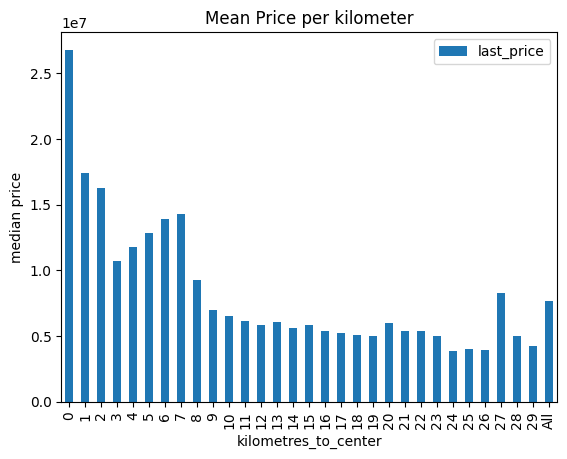

In [133]:
(
    df2.query('locality_name == "Санкт-Петербург"')[['kilometres_to_center', 'last_price']]
    .pivot_table(index='kilometres_to_center', values='last_price', margins=True)
    .plot.bar(ylabel='median price', title='Mean Price per kilometer')
);

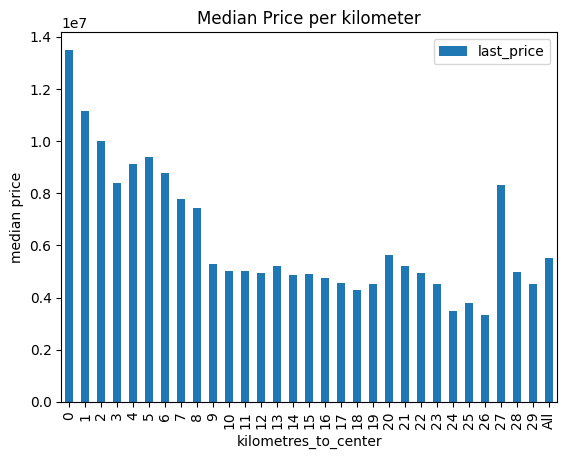

In [135]:
(
    df2.query('locality_name == "Санкт-Петербург"')[['kilometres_to_center', 'last_price']]
    .pivot_table(index='kilometres_to_center', values='last_price', margins=True, aggfunc='median')
    .plot.bar(ylabel='median price', title='Median Price per kilometer')
);

**Вывод**

Неудивительно что мы видим наиболее высокие цены в центре, и средняя и медиана имеют локлальный минимум в 3 км от центра, в остальном наблюдается резкое падение цены до 9 километра, где цены стабилизируются и падение становится более плавным. Есть несколько более высоких значений после 20, но учитывая низкое количество объявлений можем утверждать что в целом трэнд продолжается.

## 9. <a id='toc9_'></a>[Общий вывод](#toc0_)

Задачей проекта было произвести анализ цены квартир в Санкт-Петербурге и окрестностях. 

В процессе обработки данных была проведена работа с пропусками, особое внимания рекомендую уделить при сборе данных для дальнейших исследований пропускам появившимся при автоматическом картографическом анализе, на них в большей степени возможно повлиять чем на пропуски в категориях извлекаемых из объявлений. Населённые пункты зачастую имеют близкие или одинаковые имена, что усложняет анализ и требует дополнительного внимания, данная информация была обработана в рамках устранения неявных дубликатов.

Добавление в таблицу новых столбцов позволило более детально рассмотреть определённые категории данных а также аггрегировать такую важную информацию как стоимость квадратного метра. Учитывая хаотичную природу рынка ряд записей был отброшен как аномальный, где возможно вносились изменения для того чтобы убрать аномалию сохранив данные. 

После этого был проведён анализ времени между публикацией и снятием объявления, сигнализирующей скорость продаж. В целом быстрыми можно назвать продажи в первые 90 дней, объявления же, которые сохраняются на рынке более полугода (180 дней), рискуют на долго остаться без покупателя. 

Из характеристик влияющих а стоимость квартир имеет смысл выделить общую и жилую площади помещений, в особенности для сравнительно дешёвых квартир. Большая часть связи жилой площади может быть прямым следствием разницы в общей площади, о чём подсказывает низкая зависимость цены от площади кухни, тем не менее жилая площадь является важной характеристикой с точки зрения предсказания цены. Так же интересно заметить что квартиры не находящиеся на первом и последнем этажах покупают более охотно, о чём говорит разница в ценах этих категорий. Рынок недвижимости в целом стабилен и не подвержен сильным колебаний не из года в год, не из месяца в месяц.

Так же был проведён анализ средней цены одного квадратного метра разных населённых пунктов, он показал что в Зеленогорске аномально высокие цены, но в остальном результат соответствует ожиданиям - крупные населённые пункты показывают более высокий уровень цен и количество продаж. Похожая тенденция наблюдается в самом санкт петербурге где средняя цена на квартире в центре города в три раза выше средней цены по городу. В остальном цена по городу распределена по убыванию, на 3м километре локальный минимум, на 9 резкое падение прекращается и начинается более плавное сокращение. Похожая ситуация с медианой, однако она только в два раза выше в центре города что говорит об искажении средних цен в центре большими значениями.
